# Sama Amr Habib

# Risk Analytics In Banking & Financial Services 1


The case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

1. Step1: Normal EDA , then concatenated app,prev data 
2. Step2: Combined both app,prev and worked on it EDA 

# Detailed analysis (EDA) on application_data to identify the important features which help us to identify the defaulters

# Import Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

# Explore data

In [25]:
app=pd.read_csv("application_data.csv")
prev=pd.read_csv("previous_application.csv")
col=pd.read_csv("columns_description.csv",encoding='ISO-8859-1')
# The file I'm trying to read might not actually be encoded in utf-8. It could be using another encoding like ISO-8859-1

In [26]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### 1. 'application_data.csv'
It contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

In [27]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

#### 2. 'previous_application.csv'
It contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [28]:
col.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

#### 3. 'columns_description.csv'
It is data dictionary which describes the meaning of the variables.

# Data Preprocessing

In [29]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [30]:
prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [31]:
col.describe()

Unnamed: 0
count   160.00000
mean     94.58750
std      64.12727
min       1.00000
25%      42.75000
50%      82.50000
75%     122.25000
max     213.00000

In [32]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [33]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [34]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [68]:
app.shape

(307511, 122)

In [69]:
prev.shape

(1670214, 37)

In [70]:
col.shape

(160, 5)

In [67]:
col.isnull().sum()

Unnamed: 0      0
Table           0
Row             0
Description     0
Special        91
dtype: int64

# Previous Application data

In [36]:
prev.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

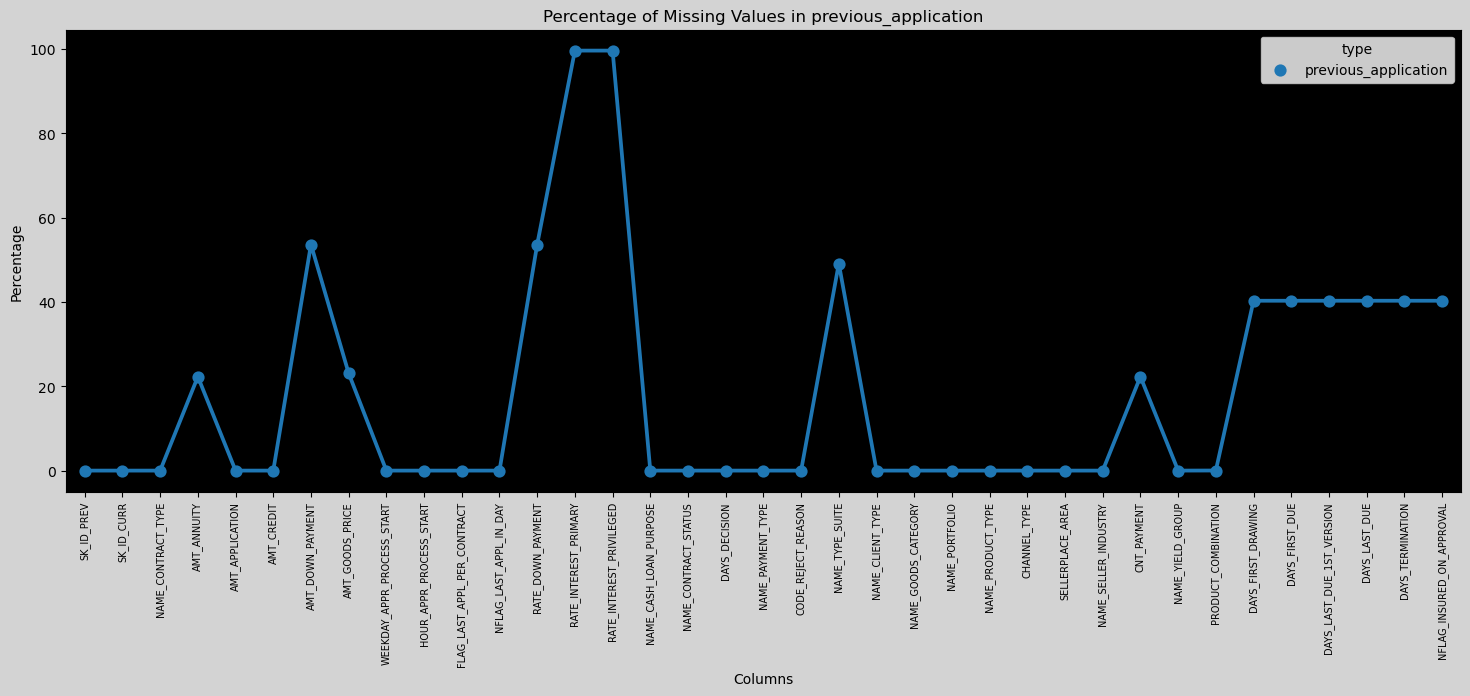

In [43]:
# Calculate percentage of missing values
miss_previous_application = pd.DataFrame({
    'column': prev.columns,
    'missing_percentage': (prev.isnull().sum() * 100) / prev.shape[0]
}).reset_index(drop=True)

# Add a type column
miss_previous_application["type"] = "previous_application"

# Plot
fig = plt.figure(figsize=(18, 6))
ax = sns.pointplot(x="column", y="missing_percentage", data=miss_previous_application, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in previous_application")
plt.ylabel("Percentage")
plt.xlabel("Columns")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()


In [44]:
round(100*(prev.isnull().sum()/len(prev.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#### Removing columns with missing values more than 50%
#### key point
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [45]:
previous_application=prev.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

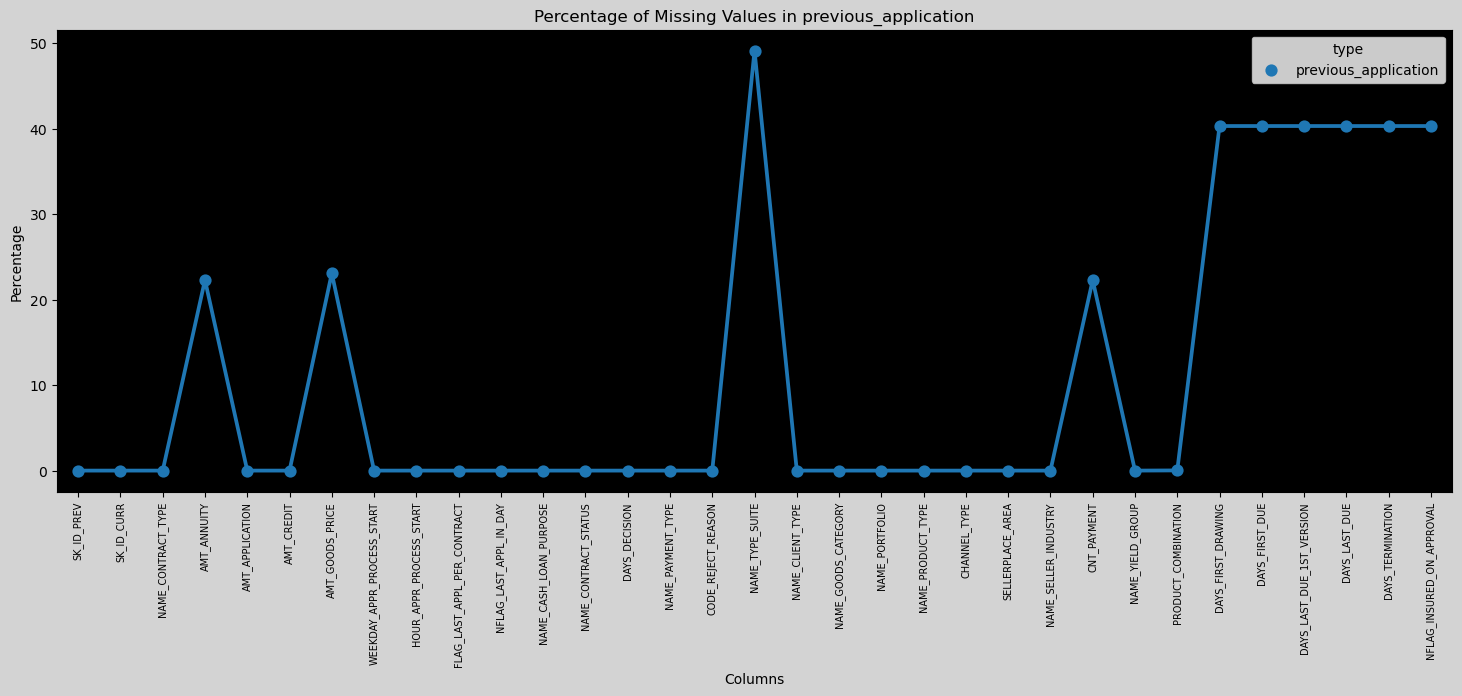

In [47]:
# Calculate the percentage of missing values for each column
miss_previous_application = pd.DataFrame({
    'column': previous_application.columns,
    'missing_percentage': (previous_application.isnull().sum() * 100) / previous_application.shape[0]
}).reset_index(drop=True)

# Add a "type" column for plotting
miss_previous_application["type"] = "previous_application"

# Create the plot
fig = plt.figure(figsize=(18, 6))
ax = sns.pointplot(x="column", y="missing_percentage", data=miss_previous_application, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in previous_application")
plt.ylabel("Percentage")
plt.xlabel("Columns")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()


In [48]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [49]:
print("AMT_ANNUITY NULL COUNT:" ,previous_application['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY NULL COUNT: 372235


In [50]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

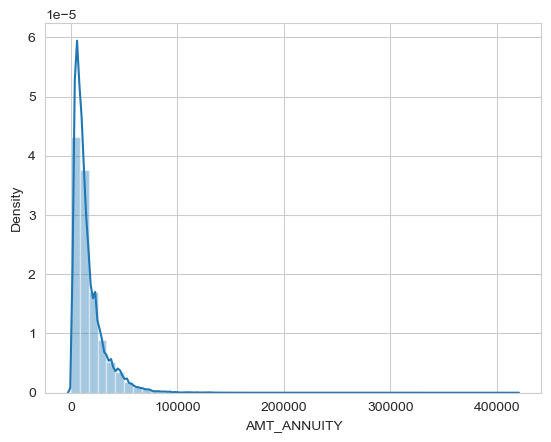

In [51]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_ANNUITY']) 
plt.show()

In [52]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 385515


In [54]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

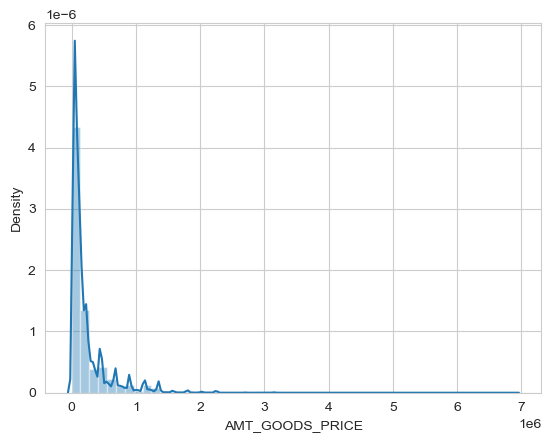

In [55]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_GOODS_PRICE']) 
plt.show()

In [56]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 820405


In [57]:
previous_application['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: count, dtype: int64

In [58]:
print("CNT_PAYMENT NULL COUNT:" ,previous_application['CNT_PAYMENT'].isnull().sum())

CNT_PAYMENT NULL COUNT: 372230


In [59]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

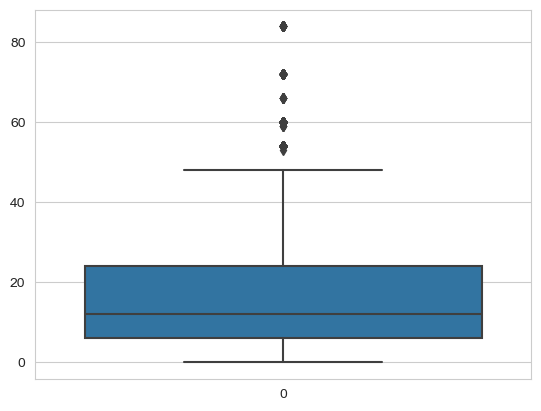

In [60]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

In [61]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [62]:
print("AMT_CREDIT :" ,previous_application['AMT_CREDIT'].isnull().sum())

AMT_CREDIT : 1


In [63]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

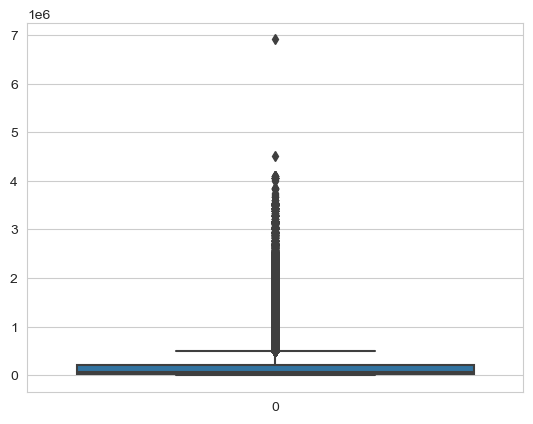

In [64]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['AMT_CREDIT']) 
plt.show()

In [65]:
previous_application['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [66]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Separating numerical and categorical columns from previous_application

In [72]:
obj_dtypes = [i for i in previous_application.select_dtypes(include=object).columns if i not in ["type"]]
num_dtypes = [i for i in previous_application.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR', 'TARGET']]

In [73]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [74]:
print(color.BOLD + color.PURPLE + 'Numerical' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Numerical 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


# Application data

In [75]:
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

Percentage of Missing values in application_data

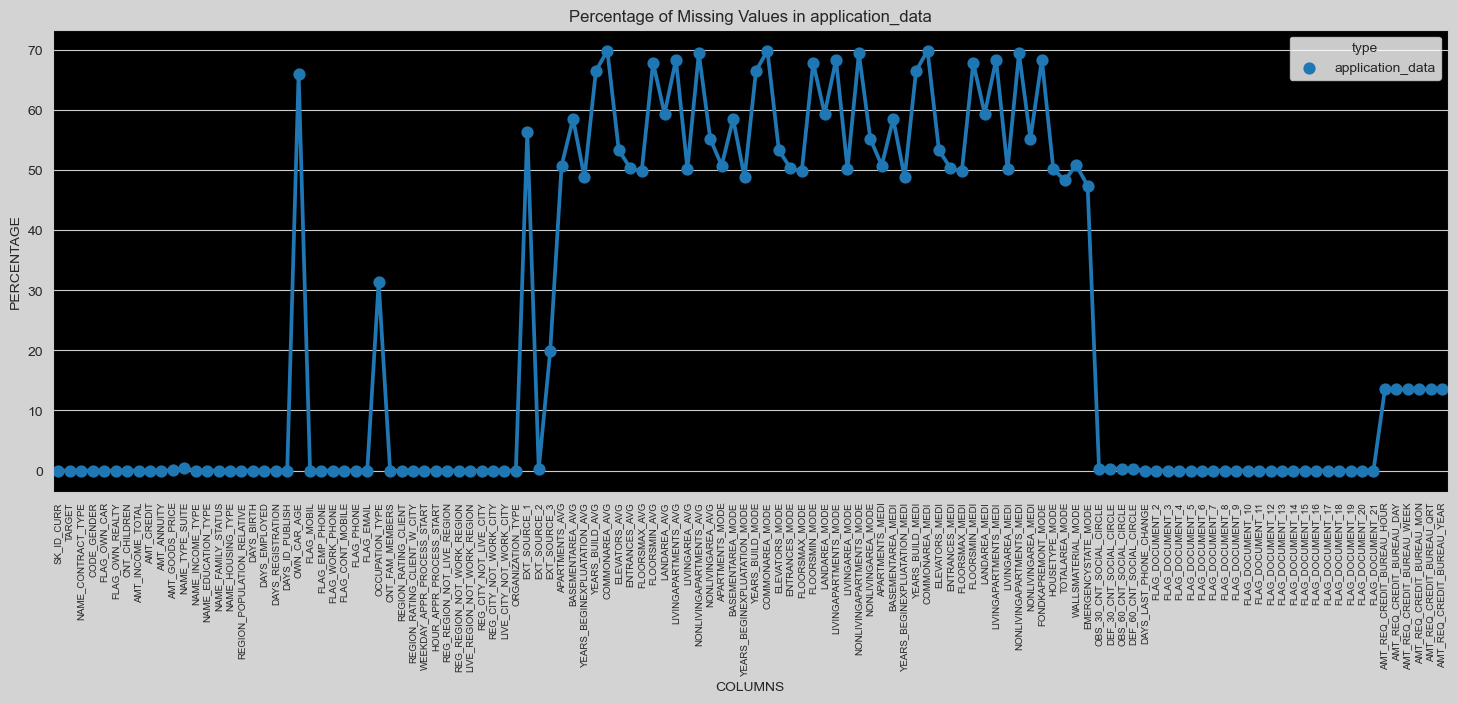

In [78]:
fig = plt.figure(figsize=(18, 6))
miss_application_data = pd.DataFrame((app.isnull().sum()) * 100 / app.shape[0]).reset_index()
miss_application_data.columns = ["index", "percentage"]  # Rename columns for clarity
miss_application_data["type"] = "application_data"
ax = sns.pointplot(x="index", y="percentage", data=miss_application_data, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()


In [80]:
round(100*(app.isnull().sum()/len(app.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### Removing columns with missing values more than 40%
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [81]:
application_data=app.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

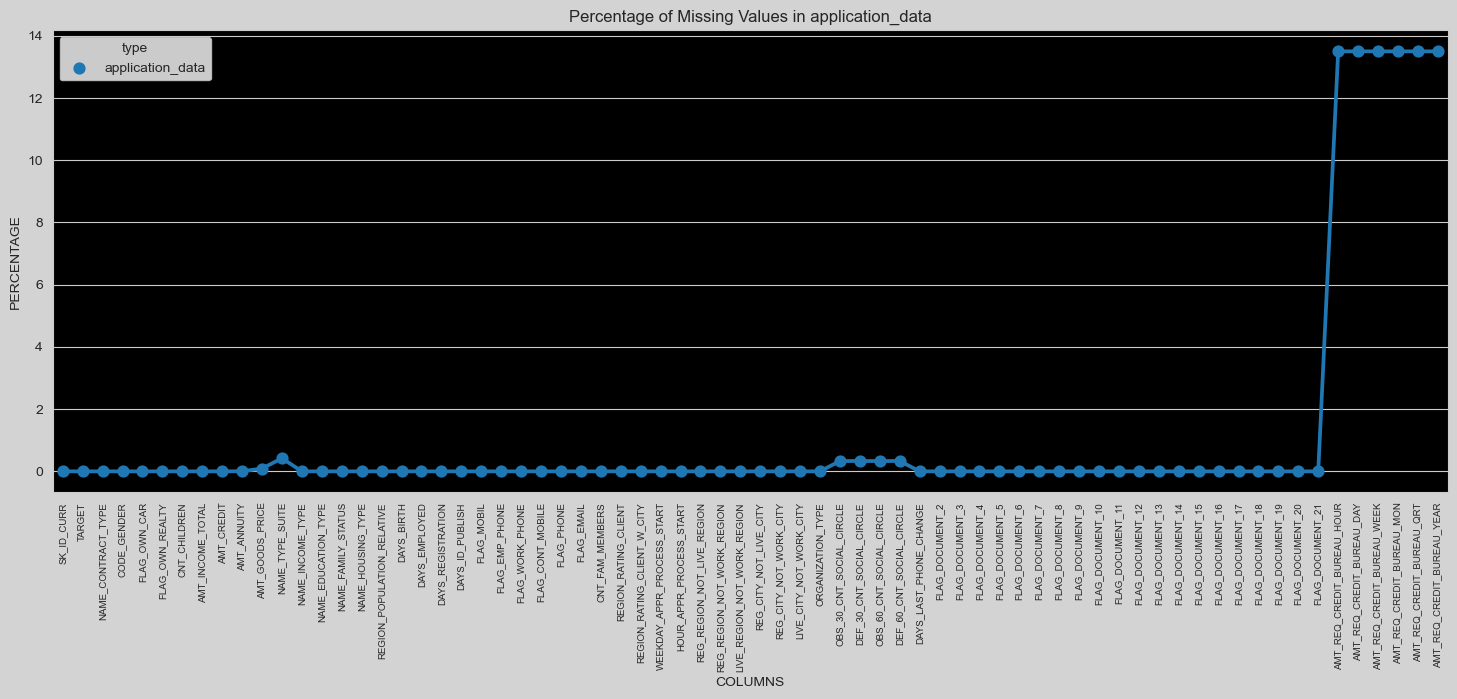

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(18, 6))

# Calculate the percentage of missing values
miss_application_data = pd.DataFrame((application_data.isnull().sum()) * 100 / application_data.shape[0]).reset_index()
miss_application_data.columns = ["index", "percentage"]  # Rename columns for clarity
miss_application_data["type"] = "application_data"

# Correctly specify x and y arguments
ax = sns.pointplot(x="index", y="percentage", data=miss_application_data, hue="type")

plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")

# Set background colors
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()


In [84]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [85]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 41519


In [87]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [88]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 41519


In [89]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [90]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [91]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY  : 12


In [92]:
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

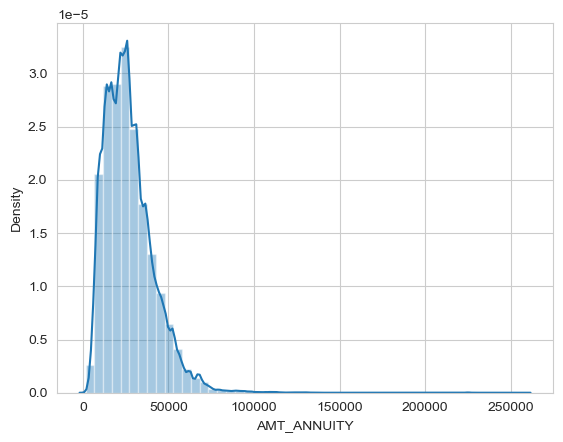

In [93]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_ANNUITY']) 
plt.show()

In [94]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE   : 278


In [95]:
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

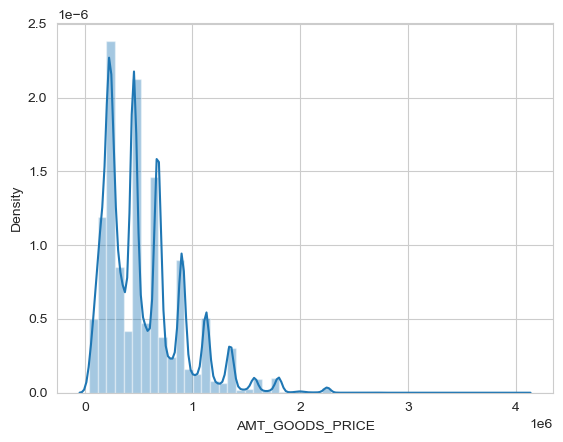

In [96]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_GOODS_PRICE']) 
plt.show()

In [97]:
import statistics 
statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])

0.0

In [98]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Converting negative values to absolute values
to make the data more intuitive, interpretable, and easier to work with in subsequent analyses. It ensures that any downstream analysis or machine learning models are not confused by negative values that are purely a result of how the data was originally encoded.

In [99]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [100]:
display("application_data")
display(application_data.head())

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

Separating numerical and categorical in application_data

In [102]:
obj_dtypes = [i for i in application_data.select_dtypes(include=object).columns if i not in ["type"]]
num_dtypes = [i for i in application_data.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR', 'TARGET']]


In [103]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [104]:
print(color.BOLD + color.PURPLE +"Numerical Columns" + color.END, "\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

Numerical Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU

Imbalance percentage

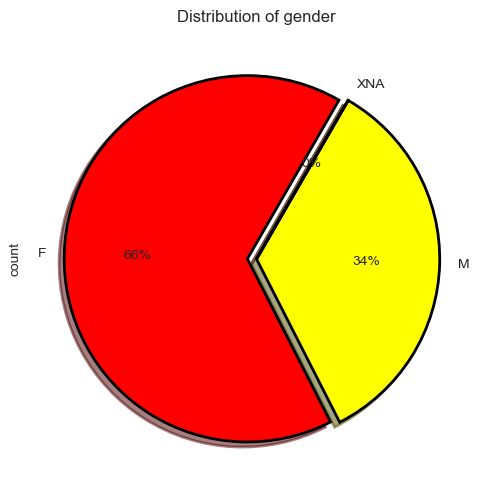

In [105]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

It's non balanced data

TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)

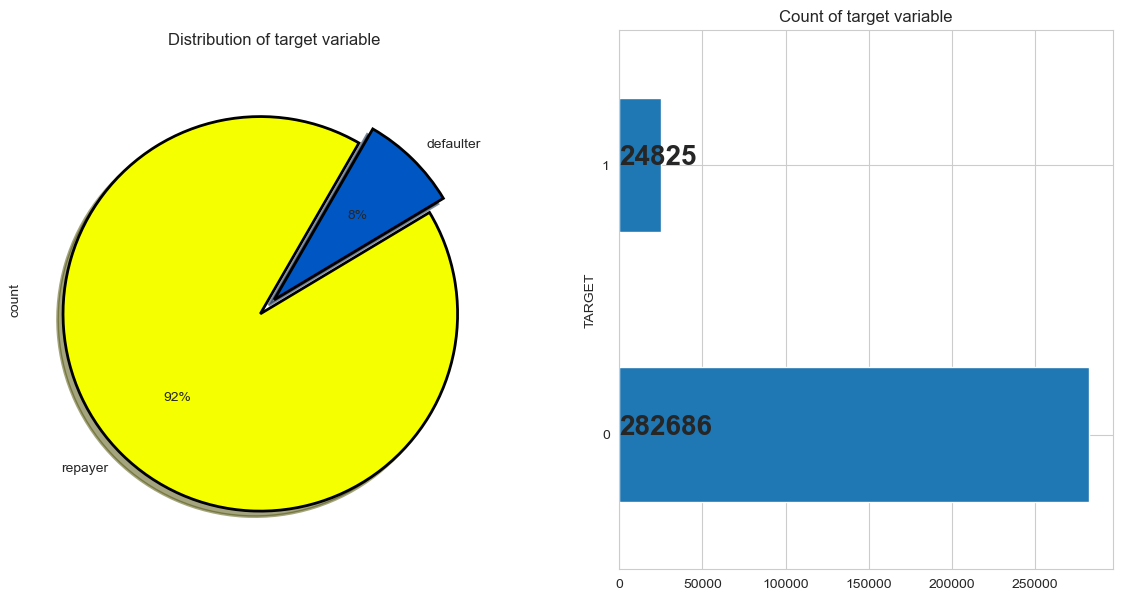

In [106]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

8% out of total client population have difficulties in repaying loans.

# Concatenating application_data and previous_application

In [107]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0) 

#### Distribution in Contract types in application_data¶
NAME_CONTRACT_TYPE : Identification if loan is cash , consumer or revolving

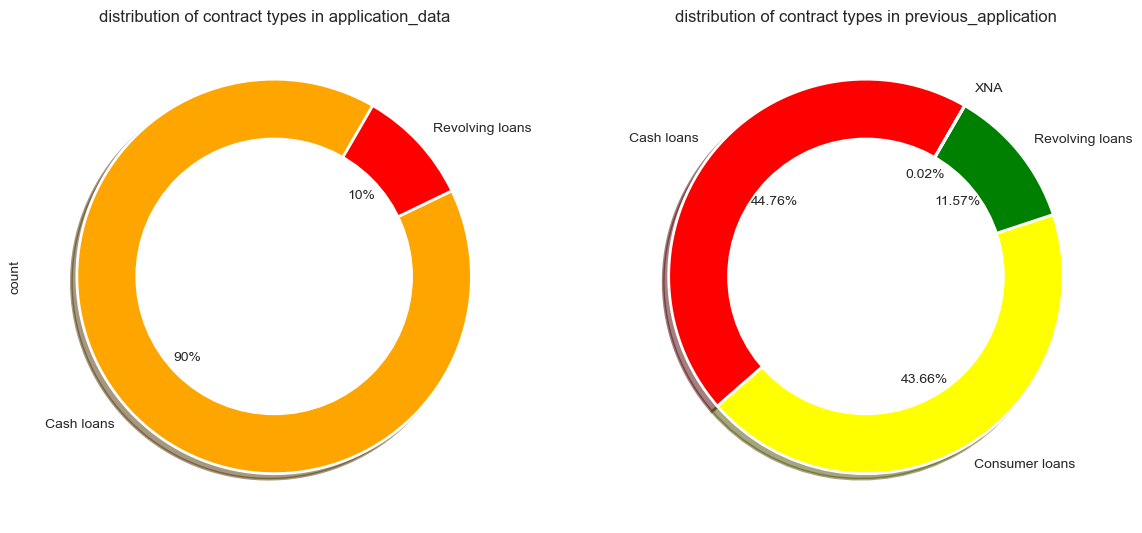

In [109]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
data[data["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()

The percentage of revolving loans and cash loans are 10% & 90%.

Gender Distribution in application_data

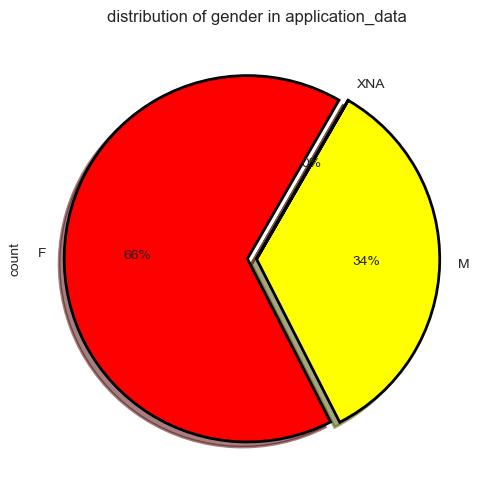

In [110]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data[data["type"] == "application_data"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of gender in application_data")
plt.show()

Distribution of Contract type by gender

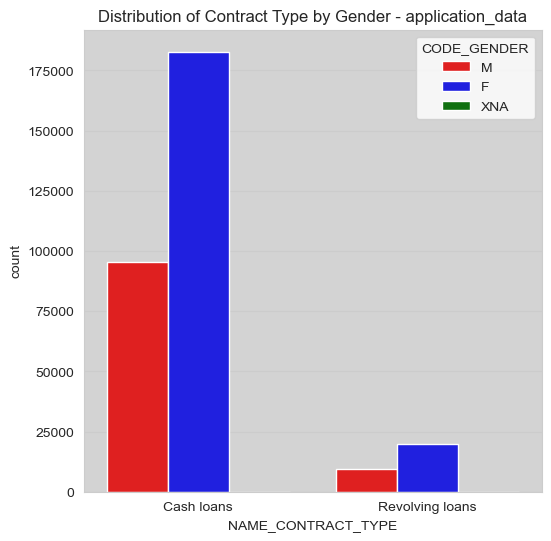

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(13, 6))
plt.subplot(121)
ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="CODE_GENDER", data=data[data["type"] == "application_data"], palette=["r", "b", "g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract Type by Gender - application_data")

plt.show()


Cash loans is always prefered over Revolving loans by both genders

Distribution of client owning a car and by gender

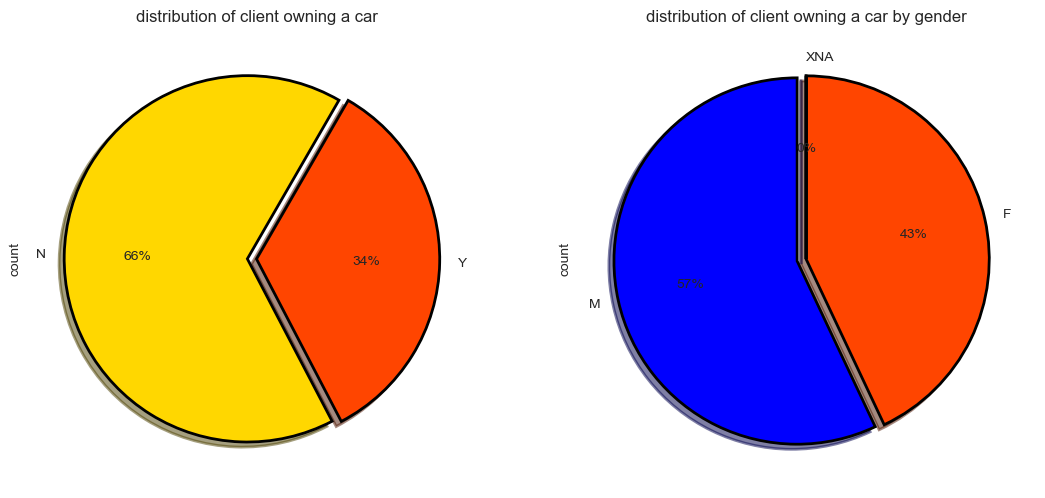

In [113]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                         wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female

Distribution of client owning a house or flat and by gender

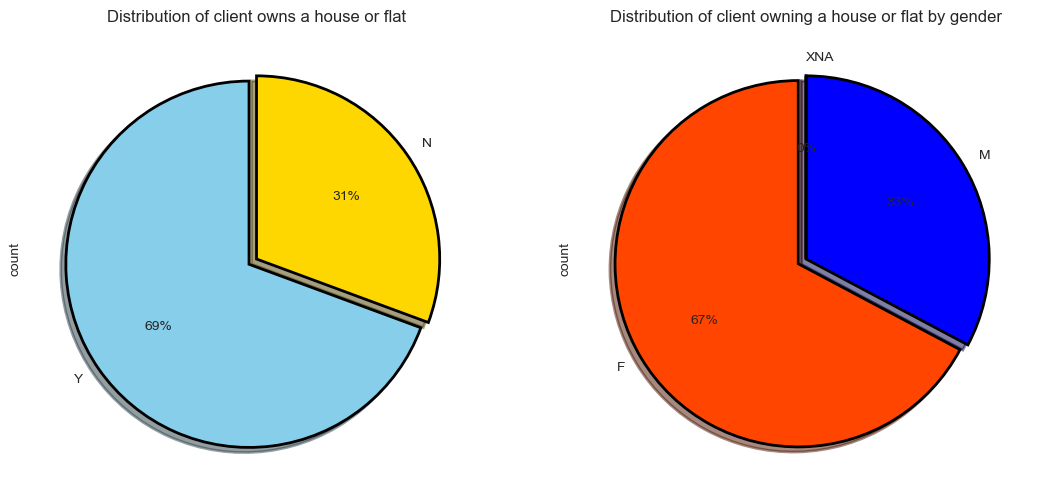

In [114]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()


SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .

SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

Distribution of Number of children and family members of client by repayment status.

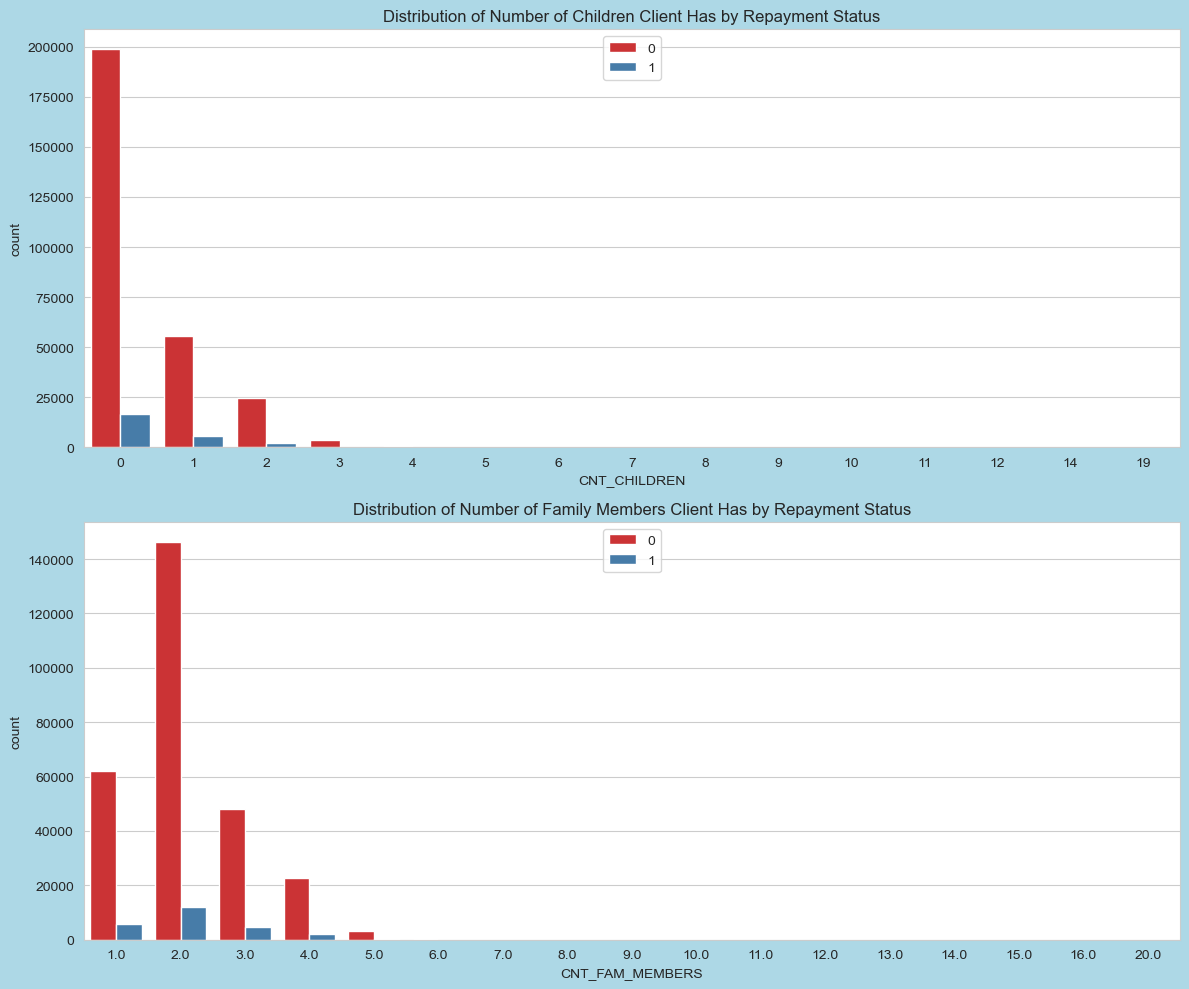

In [116]:
fig = plt.figure(figsize=(12, 10))

# Plot 1: Distribution of Number of Children by Repayment Status
plt.subplot(211)
sns.countplot(x="CNT_CHILDREN", hue="TARGET", data=application_data, palette="Set1")
plt.legend(loc="upper center")
plt.title("Distribution of Number of Children Client Has by Repayment Status")

# Plot 2: Distribution of Number of Family Members by Repayment Status
plt.subplot(212)
sns.countplot(x="CNT_FAM_MEMBERS", hue="TARGET", data=application_data, palette="Set1")
plt.legend(loc="upper center")
plt.title("Distribution of Number of Family Members Client Has by Repayment Status")

# Set figure background color
fig.set_facecolor("lightblue")

plt.tight_layout()
plt.show()


Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

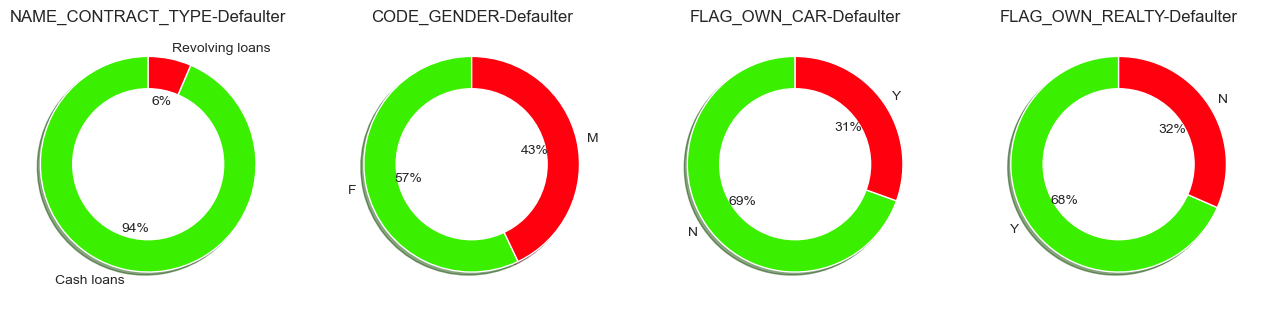

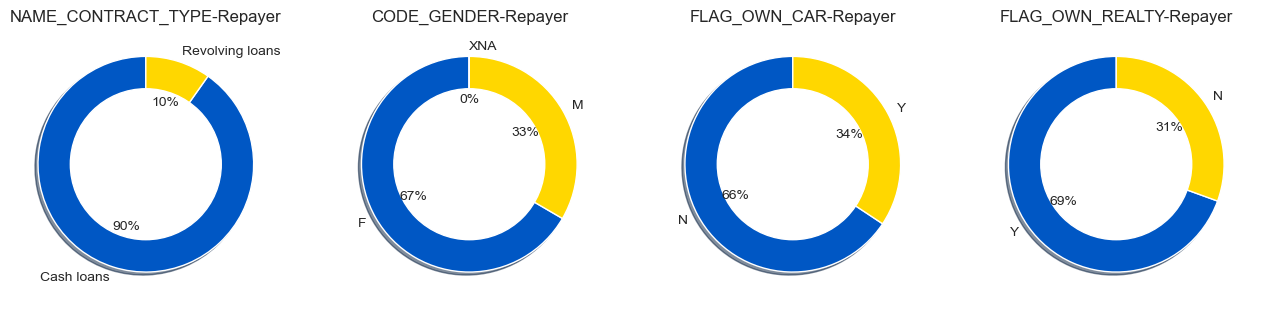

In [117]:
default = application_data[application_data["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_data[application_data["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

Percentage of males is 10% more in defaults than non defaulters.

Percentage of Cash Loans is 4% more in defaults than Revolving Loans.

#### Distribution of amount data
AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

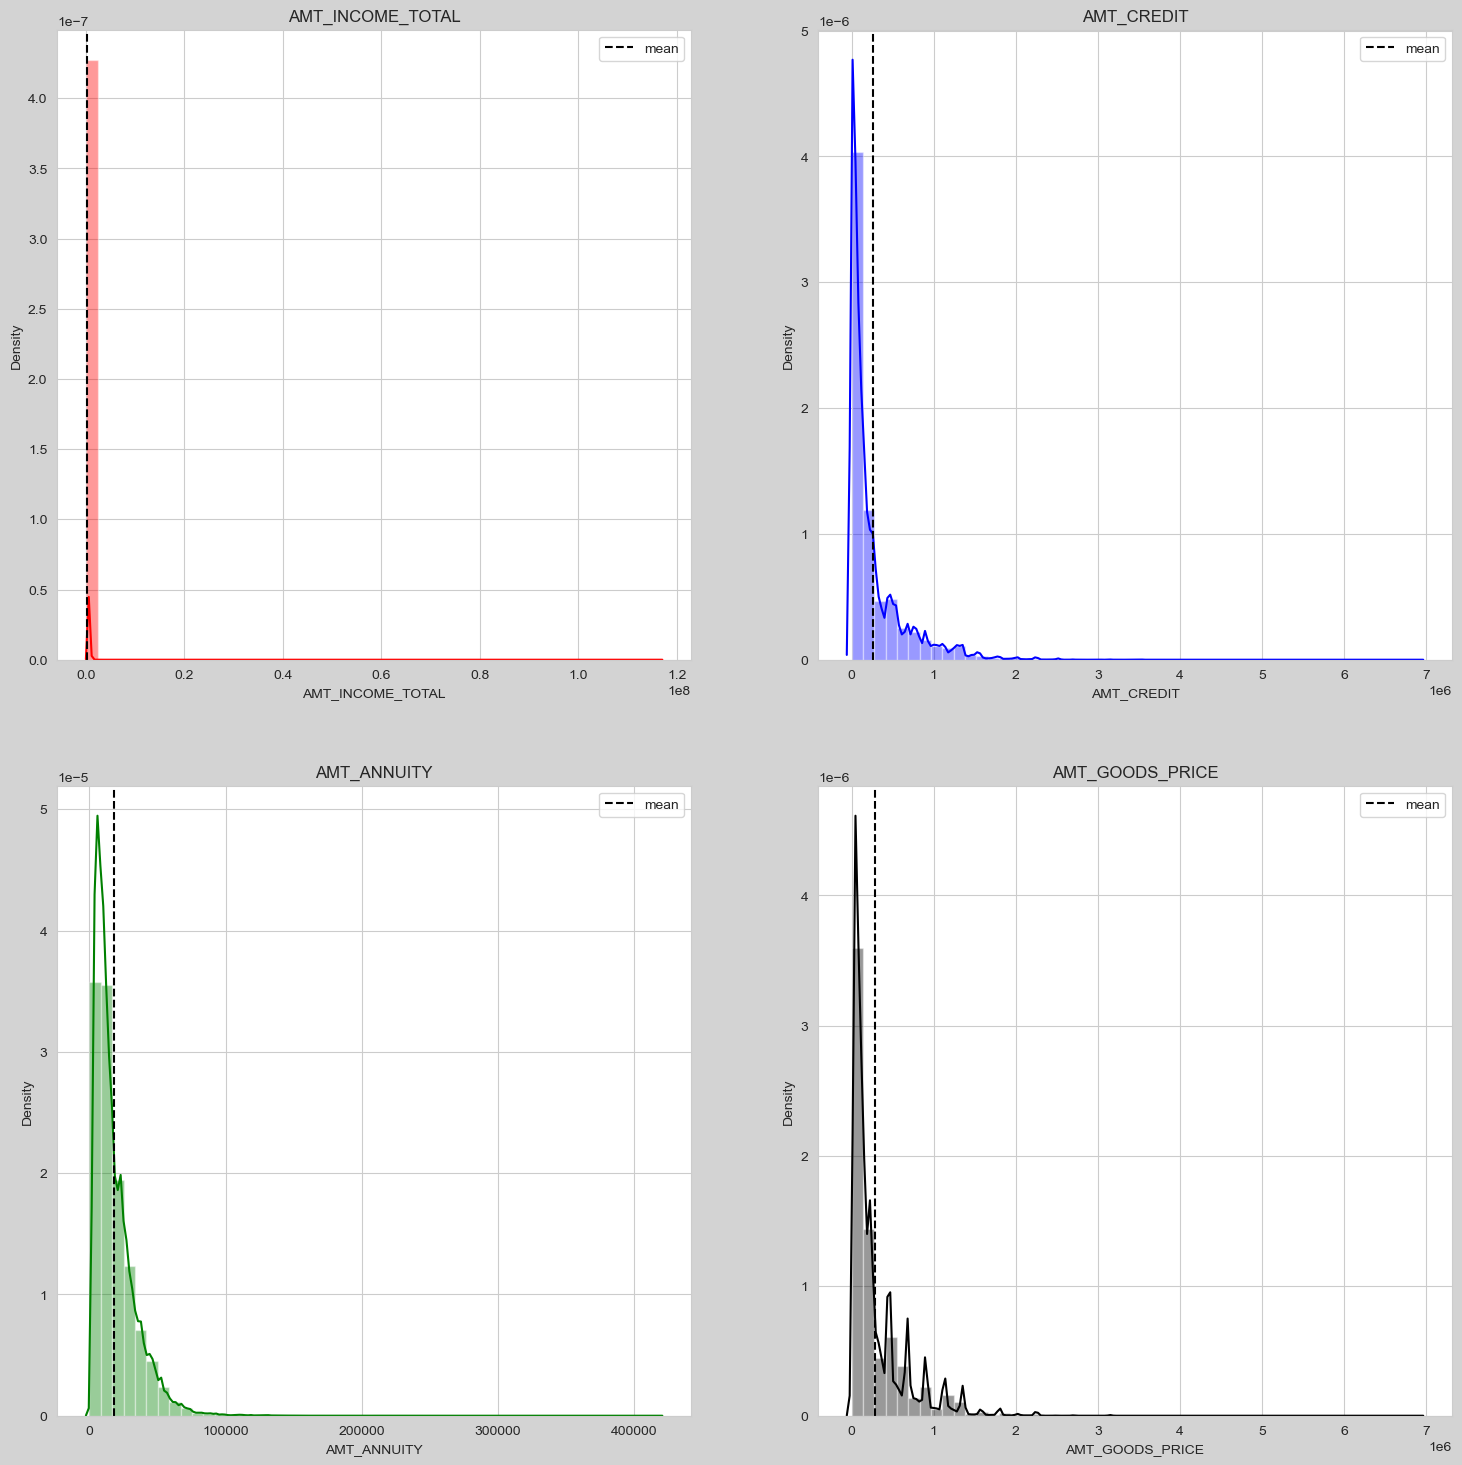

In [118]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(data[data[i].notnull()][i],color=k)
    plt.axvline(data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

### Comparing summary statistics between defaulters and non - defaulters for loan amounts.

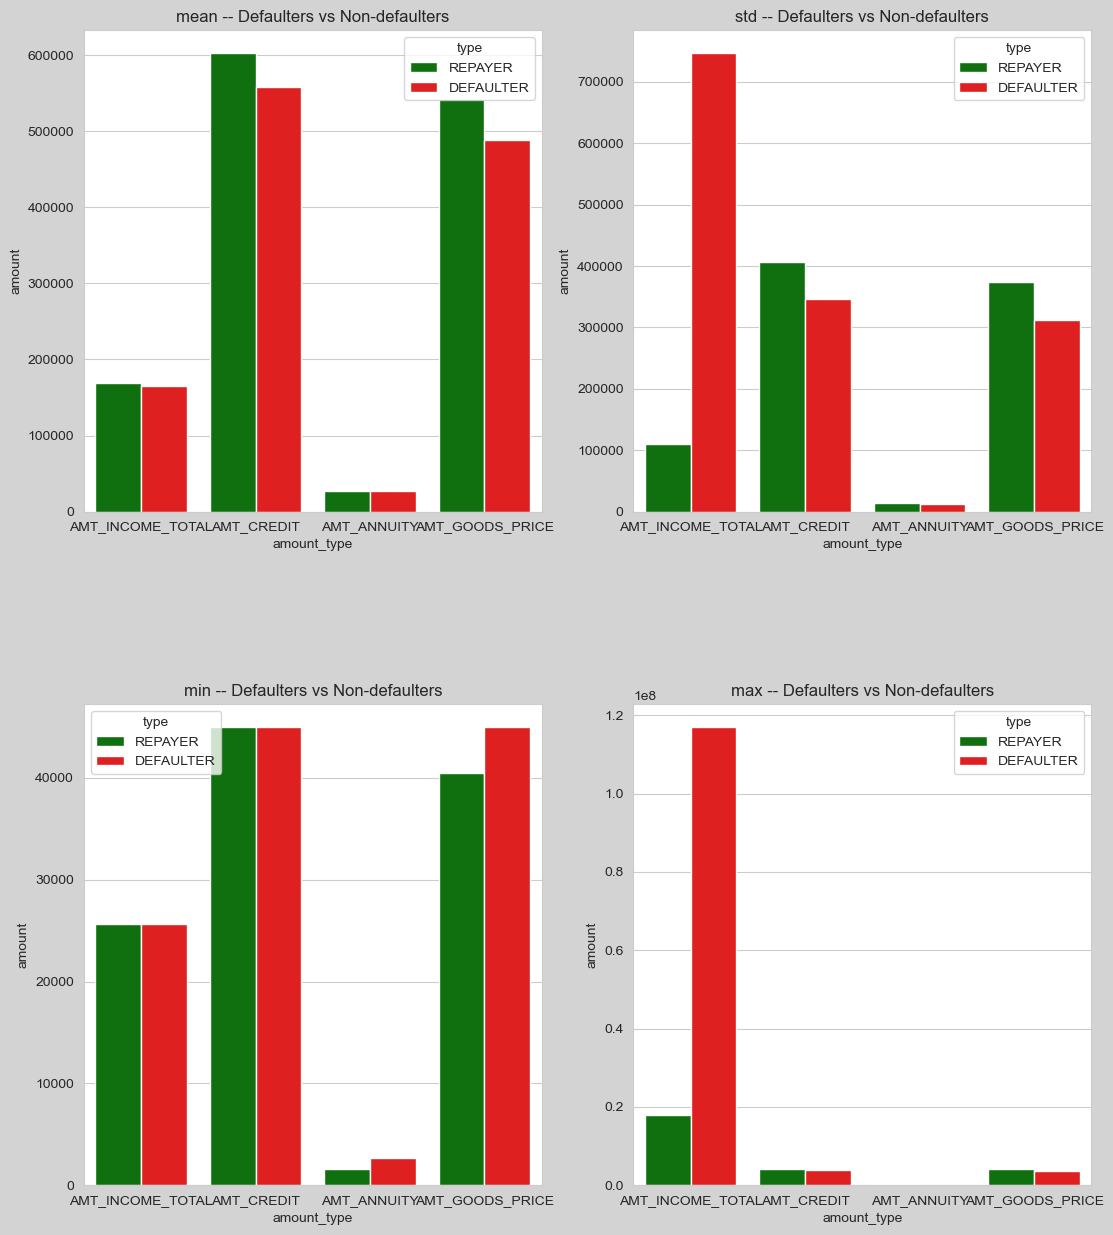

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13, 15))

# Loop through each statistic and create a subplot
for i, j in itertools.zip_longest(stat, range(length)):
    plt.subplot(2, 2, j + 1)
    # Use keyword arguments for x, y, and hue
    sns.barplot(x="amount_type", y="amount", hue="type", 
                data=df_new[df_new["statistic"] == i], palette=["g", "r"])
    
    plt.title(i + " -- Defaulters vs Non-defaulters")
    plt.subplots_adjust(hspace=0.4)

# Set the background color of each figure
fig = plt.gcf()
fig.set_facecolor("lightgrey")

plt.show()


#### Income of client -¶
1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings

Credit amount of the loan ,Loan annuity,Amount goods price -
1 . Statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

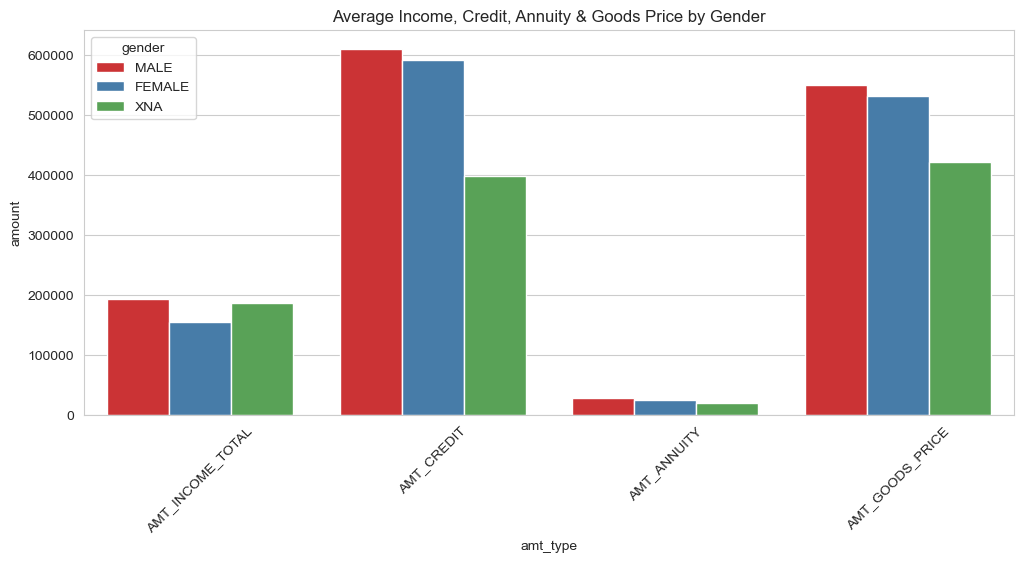

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="amt_type", y="amount", data=df_gen, hue="gender", palette="Set1")
plt.title("Average Income, Credit, Annuity & Goods Price by Gender")
plt.xticks(rotation=45)
plt.show()


Scatter plot between credit amount and annuity amount

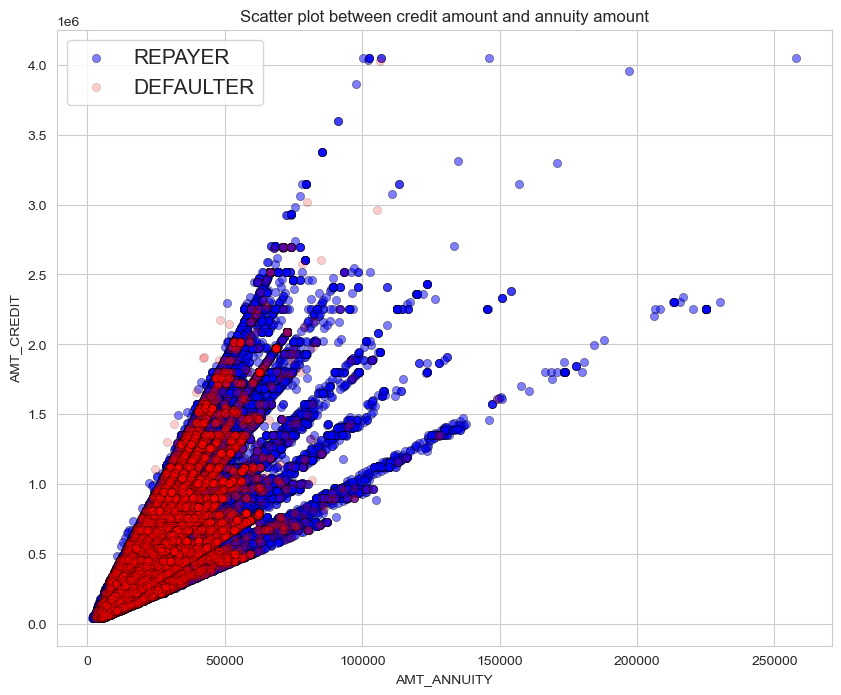

In [123]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

### Pair Plot between amount variables
AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

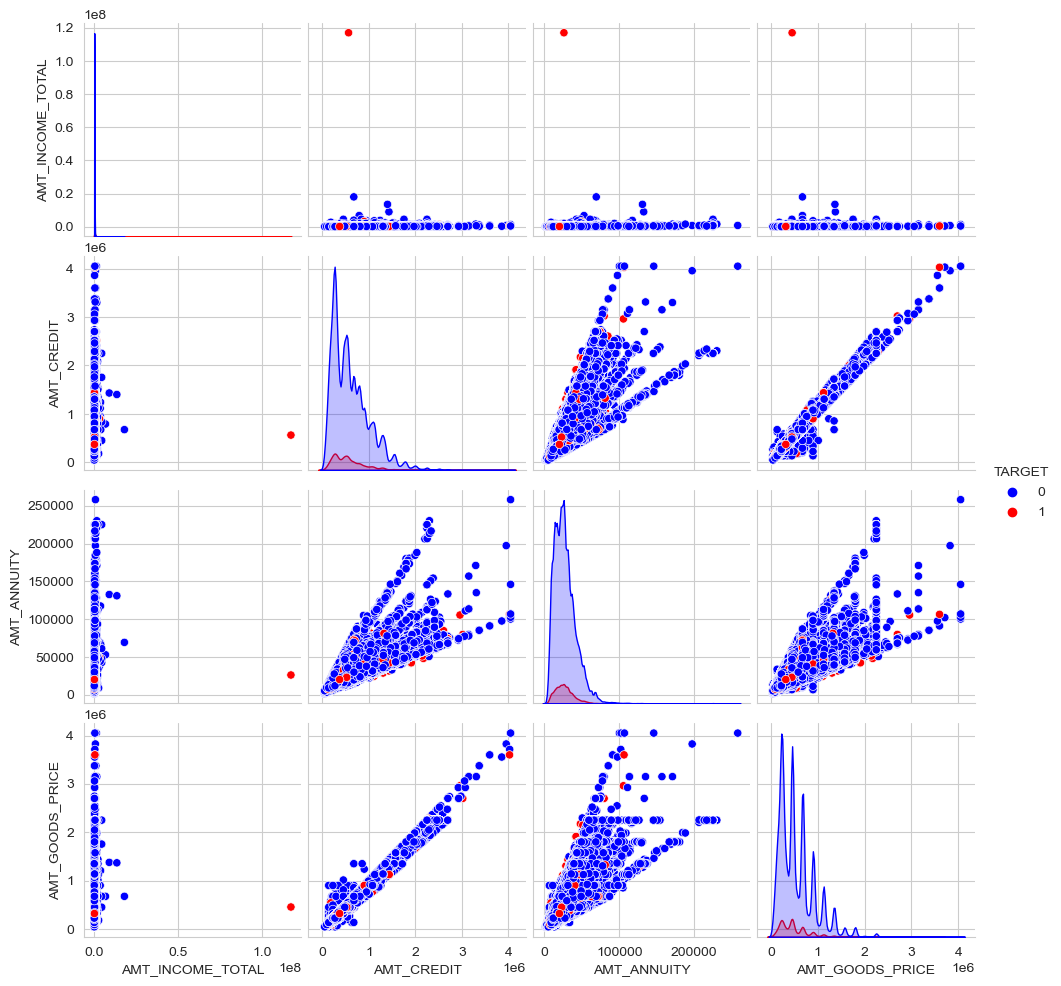

In [124]:
amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

### Distribution of Suite type
NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

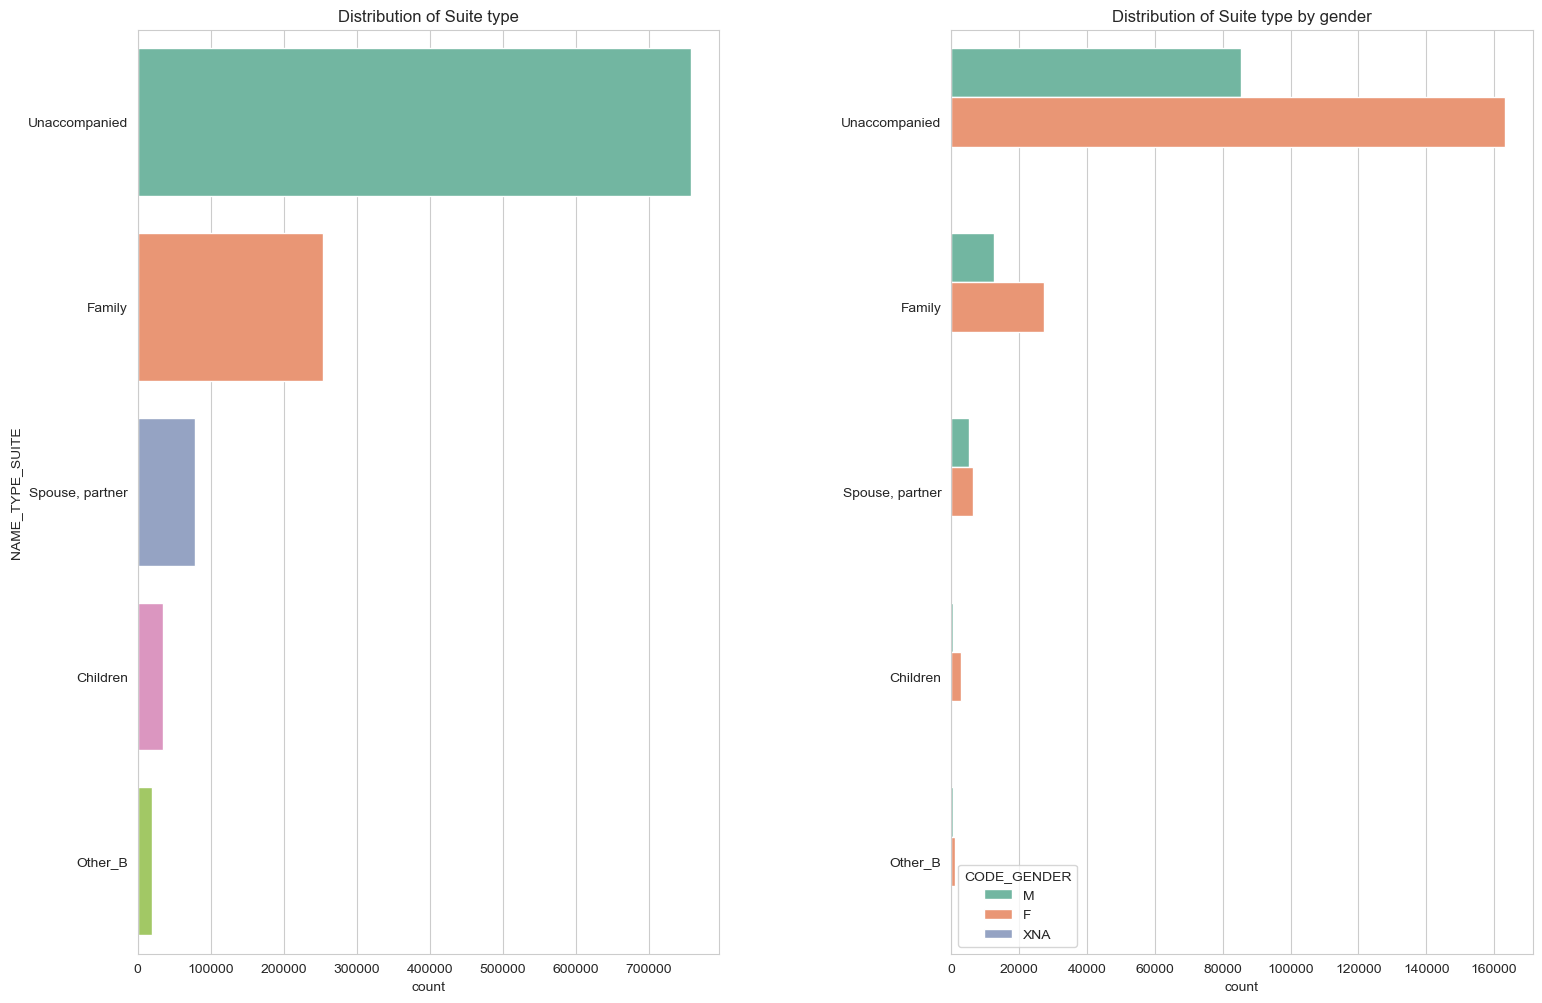

In [125]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              palette="Set2",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=data["NAME_TYPE_SUITE"],
              hue=data["CODE_GENDER"],palette="Set2",
              order=data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

#### Distribution of client income type
NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,…)

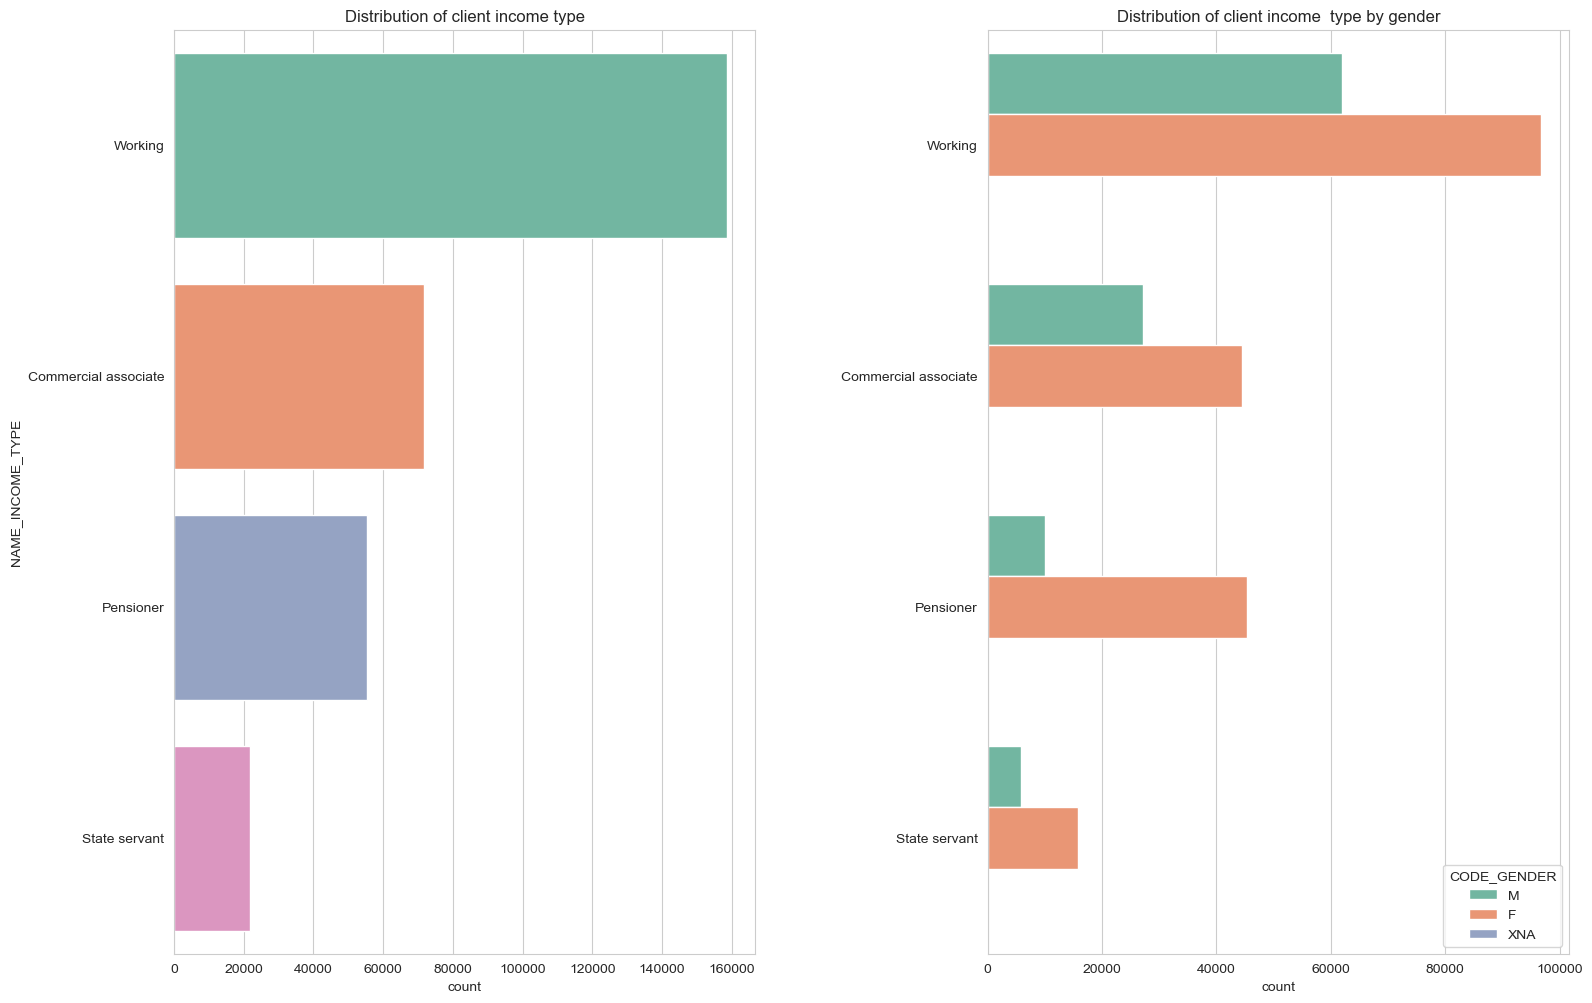

In [126]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              palette="Set2",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=data["NAME_INCOME_TYPE"],
              hue=data["CODE_GENDER"],
              palette="Set2",
              order=data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

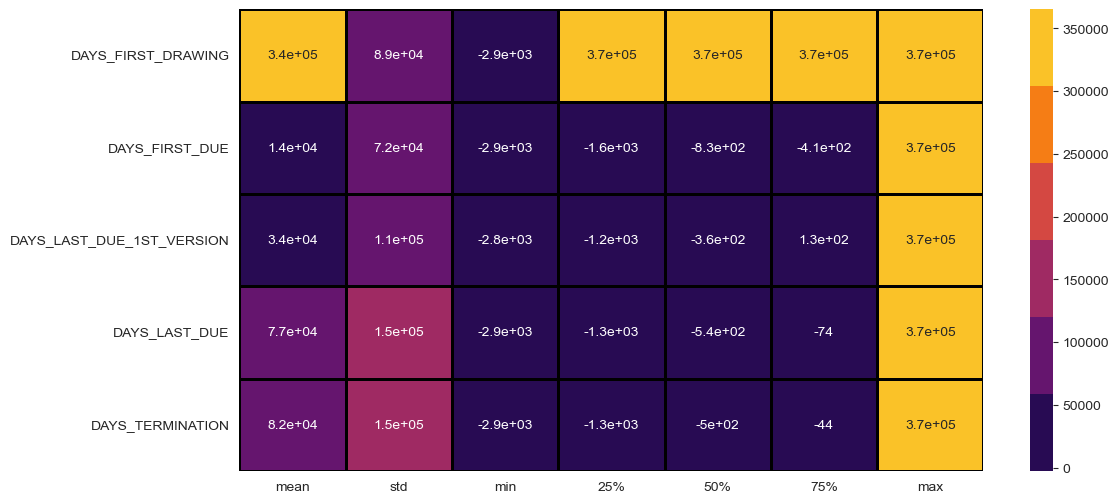

In [128]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

# Corelation between variables

### Application Data

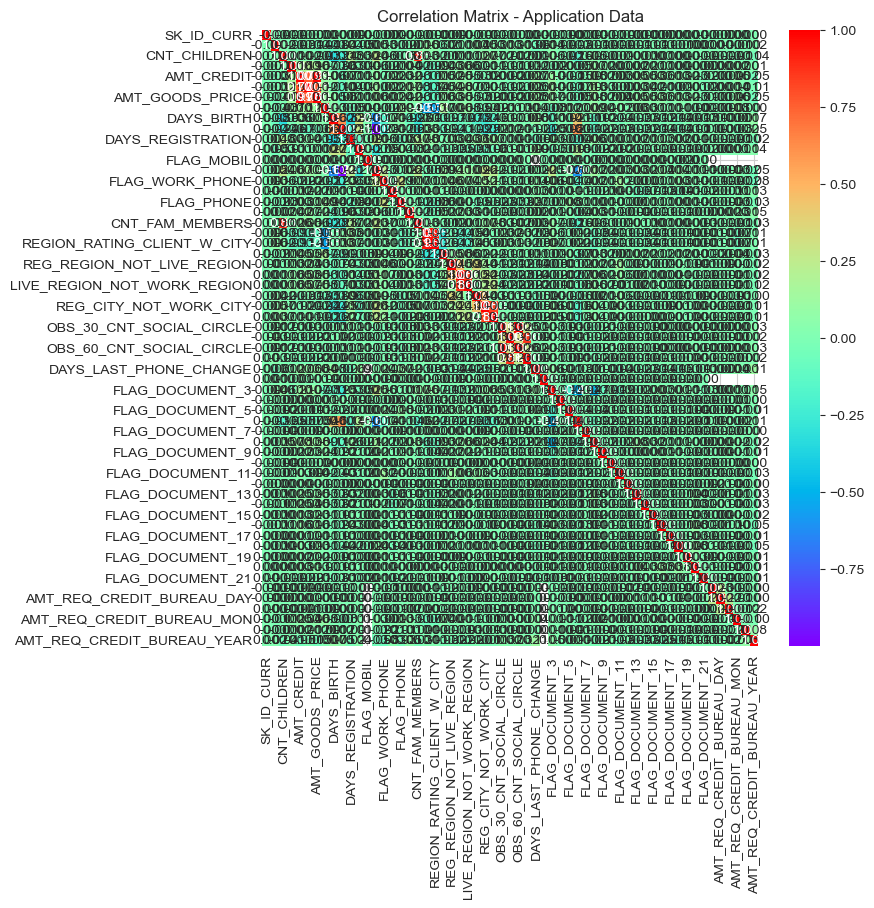

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_cols = application_data.select_dtypes(include='number')

# Calculate the correlation matrix
corrmat = numeric_cols.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, ax=ax, cmap="rainbow", annot=True, fmt=".2f")
plt.title("Correlation Matrix - Application Data")
plt.show()


### Previous Application

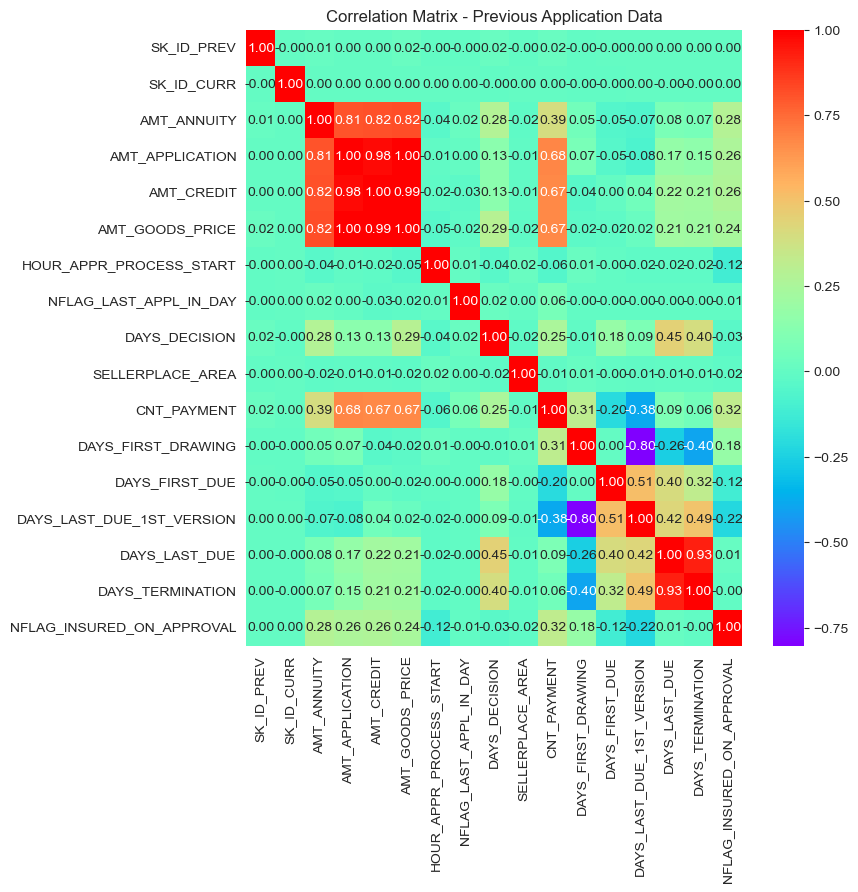

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_cols = previous_application.select_dtypes(include='number')

# Calculate the correlation matrix
corrmat = numeric_cols.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, ax=ax, cmap="rainbow", annot=True, fmt=".2f")
plt.title("Correlation Matrix - Previous Application Data")
plt.show()


In [134]:
import numpy as np

# Select only numeric columns
numeric_cols = previous_application.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corrmat = numeric_cols.corr()

# Create a DataFrame to store the correlation values above the diagonal
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop NaN values (which are not correlations)
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values and convert to absolute values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort the correlations by their absolute values in descending order
top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)

# Display the top 10 correlations
print(top_correlations)


                          Var1                Var2  Correlation
88             AMT_GOODS_PRICE     AMT_APPLICATION         1.00
89             AMT_GOODS_PRICE          AMT_CREDIT         0.99
71                  AMT_CREDIT     AMT_APPLICATION         0.98
269           DAYS_TERMINATION       DAYS_LAST_DUE         0.93
87             AMT_GOODS_PRICE         AMT_ANNUITY         0.82
70                  AMT_CREDIT         AMT_ANNUITY         0.82
53             AMT_APPLICATION         AMT_ANNUITY         0.81
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         0.80
173                CNT_PAYMENT     AMT_APPLICATION         0.68
174                CNT_PAYMENT          AMT_CREDIT         0.67


## Application Data
### Top 10 Correlation Fields for Repayer

In [135]:
df_repayer = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [137]:
import numpy as np

# Select only numeric columns from df_repayer
numeric_cols_repayer = df_repayer.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corrmat = numeric_cols_repayer.corr()

# Create a DataFrame to store the correlation values above the diagonal
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop NaN values (which are not correlations)
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values and convert to absolute values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort the correlations by their absolute values in descending order
top_correlations_repayer = corrdf.sort_values(by='Correlation', ascending=False).head(10)

# Display the top 10 correlations
print(top_correlations_repayer)


                             Var1                        Var2  Correlation
776                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
1798     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
358               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
1199  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
1064              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1858     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1619      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
359               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
299                   AMT_ANNUITY                  AMT_CREDIT         0.77


Top 10 Correlation Fields for Defaulter

In [139]:
import numpy as np

# Select only numeric columns from df_defaulter
numeric_cols_defaulter = df_defaulter.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corrmat = numeric_cols_defaulter.corr()

# Create a DataFrame to store the correlation values above the diagonal
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop NaN values (which are not correlations)
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values and convert to absolute values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort the correlations by their absolute values in descending order
top_correlations_defaulter = corrdf.sort_values(by='Correlation', ascending=False).head(10)

# Display the top 10 correlations
print(top_correlations_defaulter)


                             Var1                        Var2  Correlation
1798     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
776                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
358               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
1199  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
1064              CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
1858     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1619      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
299                   AMT_ANNUITY                  AMT_CREDIT         0.75
359               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75


In [140]:
mergeddf =  pd.merge(application_data,previous_application,on='SK_ID_CURR')
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.003541       16765          -1188            -1186.0   
3                    0.003541       16765          -1188            -1186.0   
4                    0.010032       19046           -225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              2.0   
3                 1           1           0              2.0   
4                 1           1           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                         

In [141]:
y = mergeddf.groupby('SK_ID_CURR').size()
dfA = mergeddf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y
display(dfA.head(10))

TARGET  count
SK_ID_CURR               
100002           1      1
100003           0      3
100004           0      1
100006           0      9
100007           0      6
100008           0      5
100009           0      7
100010           0      1
100011           0      4
100012           0      4

In [142]:
dfA.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681           0     73
173680           0     72
242412           0     68
206783           0     67
389950           0     64
382179           0     64
198355           0     63
345161           0     62
446486           0     62
238250           0     61

In [143]:
df_repayer = dfA[dfA['TARGET'] == 0]
df_defaulter = dfA[dfA['TARGET'] == 1]

Repayers' Borrowing History

In [144]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681           0     73
173680           0     72
242412           0     68
206783           0     67
382179           0     64
389950           0     64
198355           0     63
446486           0     62
345161           0     62
280586           0     61

In [145]:
df_defaulter.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
100002           1      1
333349           1      1
333587           1      1
333582           1      1
333534           1      1
333506           1      1
333419           1      1
333355           1      1
333337           1      1
334761           1      1

# 2nd contains data where we inner join the records (application_data, previous_application) with same the SK_ID_CURR

In [147]:
application_data=pd.read_csv("application_data.csv")
previous_application=pd.read_csv("previous_application.csv")
columns_description=pd.read_csv("columns_description.csv",encoding='ISO-8859-1')
# The file I'm trying to read might not actually be encoded in utf-8. It could be using another encoding like ISO-8859-1

In [148]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

# Combine data

In [149]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
combined_df= pd.merge(application_data, previous_application, on='SK_ID_CURR', how='inner')

combined_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
display(combined_df.head(10))

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0       100002       1           Cash loans           M            N   
1       100003       0           Cash loans           F            N   
3       100003       0           Cash loans           F            N   
2       100003       0           Cash loans           F            N   
4       100004       0      Revolving loans           M            Y   
9       100006       0           Cash loans           F            N   
10      100006       0           Cash loans           F            N   
8       100006       0           Cash loans           F            N   
13      100006       0           Cash loans           F            N   
5       100006       0           Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                Y             0          202500.0      406597.5   
1                N             0          270000.0     1293502.5   
3                N             0          270000.0     1293502.5   
2                N             0          270000.0     1293502.5   
4                Y             0           67500.0      135000.0   
9                Y             0          135000.0      312682.5   
10               Y             0          135000.0      312682.5   
8                Y             0          135000.0      312682.5   
13               Y             0          135000.0      312682.5   
5                Y             0          135000.0      312682.5   

    AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0         24700.5           351000.0     Unaccompanied          Working   
1         35698.5          1129500.0            Family    State servant   
3         35698.5          1129500.0            Family    State servant   
2         35698.5          1129500.0            Family    State servant   
4          6750.0           135000.0     Unaccompanied          Working   
9         29686.5           297000.0     Unaccompanied          Working   
10        29686.5           297000.0     Unaccompanied          Working   
8         29686.5           297000.0     Unaccompanied          Working   
13        29686.5           297000.0     Unaccompanied          Working   
5         29686.5           297000.0     Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
1                Higher education               Married  House / apartment   
3                Higher education               Married  House / apartment   
2                Higher education               Married  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
9   Secondary / secondary special        Civil marriage  House / apartment   
10  Secondary / secondary special        Civil marriage  House / apartment   
8   Secondary / secondary special        Civil marriage  House / apartment   
13  Secondary / secondary special        Civil marriage  House / apartment   
5   Secondary / secondary special        Civil marriage  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
1                     0.003541      -16765          -1188            -1186.0   
3                     0.003541      -16765          -1188            -1186.0   
2                     0.003541      -16765          -1188            -1186.0   
4                     0.010032      -19046           -225            -4260.0   
9                     0.008019      -19005          -3039            -9833.0   
10                    0.008019      -19005          -3039            -9833.0   
8                     0.008019      -19005          -3039            -9833.0   
13                    0.008019      -19005          -3039

In [150]:
combined_df.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
combined_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0       100002       1           Cash loans           M            N   
2       100003       0           Cash loans           F            N   
4       100004       0      Revolving loans           M            Y   
6       100006       0           Cash loans           F            N   
15      100007       0           Cash loans           M            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                Y             0          202500.0      406597.5   
2                N             0          270000.0     1293502.5   
4                Y             0           67500.0      135000.0   
6                Y             0          135000.0      312682.5   
15               Y             0          121500.0      513000.0   

    AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0         24700.5           351000.0     Unaccompanied          Working   
2         35698.5          1129500.0            Family    State servant   
4          6750.0           135000.0     Unaccompanied          Working   
6         29686.5           297000.0     Unaccompanied          Working   
15        21865.5           513000.0     Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
2                Higher education               Married  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
6   Secondary / secondary special        Civil marriage  House / apartment   
15  Secondary / secondary special  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
2                     0.003541      -16765          -1188            -1186.0   
4                     0.010032      -19046           -225            -4260.0   
6                     0.008019      -19005          -3039            -9833.0   
15                    0.028663      -19932          -3038            -4311.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
2              -291           1               1                0   
4             -2531           1               1                1   
6             -2437           1               1                0   
15            -3458           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                  1           1           0              1.0   
2                  1           1           0              2.0   
4                  1           1           0              1.0   
6                  1           0           0              2.0   
15                 1           0           0              1.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
2                      1                            1   
4                      2                            2   
6                      2                            2   
15                     2                            2   

   WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     WEDNESDAY                         10   
2                        MONDAY                         11   
4                        MONDAY                          9   
6                     WEDNESDAY                         17   
15                     THURSDAY                         11   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
2                            0                           0   
4                            0                           0 

# Converting negative values to absolute values

In [151]:
combined_df['DAYS_BIRTH'] = abs(combined_df['DAYS_BIRTH'])
combined_df['DAYS_ID_PUBLISH'] = abs(combined_df['DAYS_ID_PUBLISH'])
combined_df['DAYS_ID_PUBLISH'] = abs(combined_df['DAYS_ID_PUBLISH'])
combined_df['DAYS_LAST_PHONE_CHANGE'] = abs(combined_df['DAYS_LAST_PHONE_CHANGE'])

# Corelation between variables

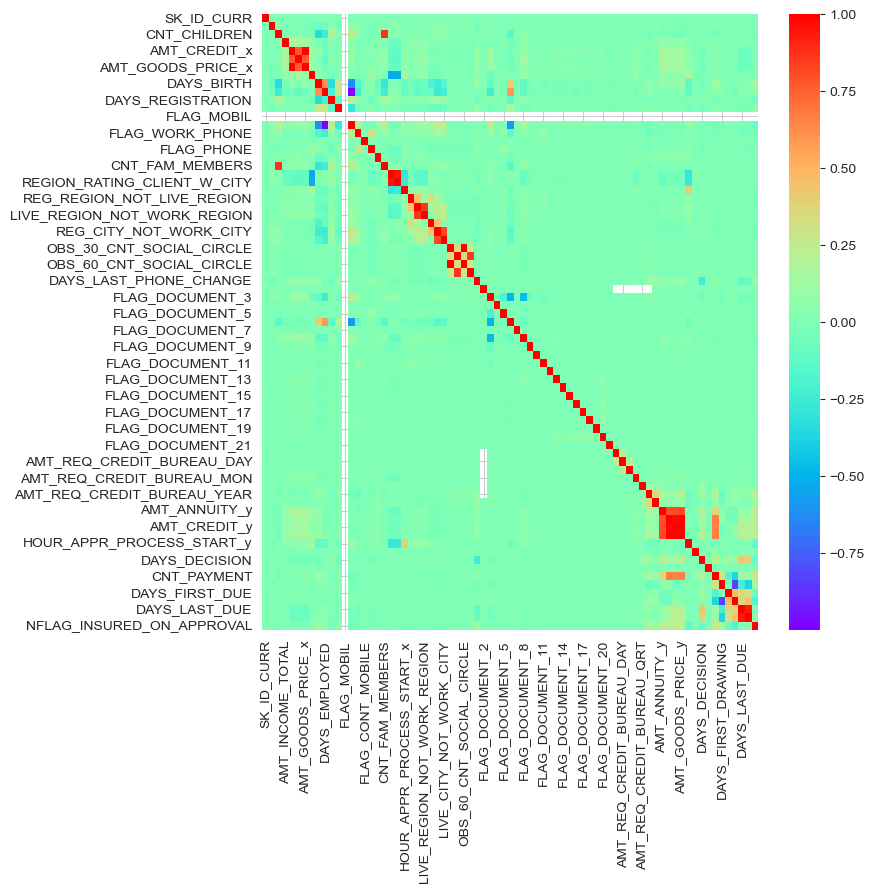

In [153]:
# Select only numeric columns from the combined_df
numeric_cols_combined = combined_df.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
corrmat = numeric_cols_combined.corr()

# Create a heatmap for the correlation matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, ax=ax, cmap="rainbow")
plt.show()


Top 10 Correlation Fields

In [158]:
# Select only the numeric columns in the DataFrame
numeric_cols_combined = combined_df.select_dtypes(include='number')

# Compute the correlation matrix for numeric columns only
corrmat = numeric_cols_combined.corr()

# Apply the upper triangle mask to avoid duplicate correlations
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))


# Unstack the correlation matrix and reset index
corrdf = corrdf.unstack().reset_index()

# Rename columns for clarity
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values (those from the lower triangle)
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values to two decimal places and take the absolute value
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort by the correlation values in descending order and get the top 10
top_10_corr = corrdf.sort_values(by='Correlation', ascending=False).head(10)

# Display the top 10 correlations
top_10_corr


Var1                        Var2  Correlation
2278     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
4786            AMT_GOODS_PRICE_y             AMT_APPLICATION         1.00
984                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
4787            AMT_GOODS_PRICE_y                AMT_CREDIT_y         0.99
454             AMT_GOODS_PRICE_x                AMT_CREDIT_x         0.99
4711                 AMT_CREDIT_y             AMT_APPLICATION         0.97
1519  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
5547             DAYS_TERMINATION               DAYS_LAST_DUE         0.93
1352              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1823  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.87

Imbalace percentage

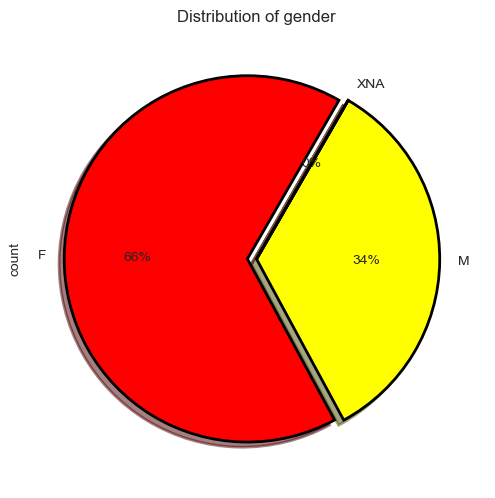

In [159]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

Distribution of Target variable

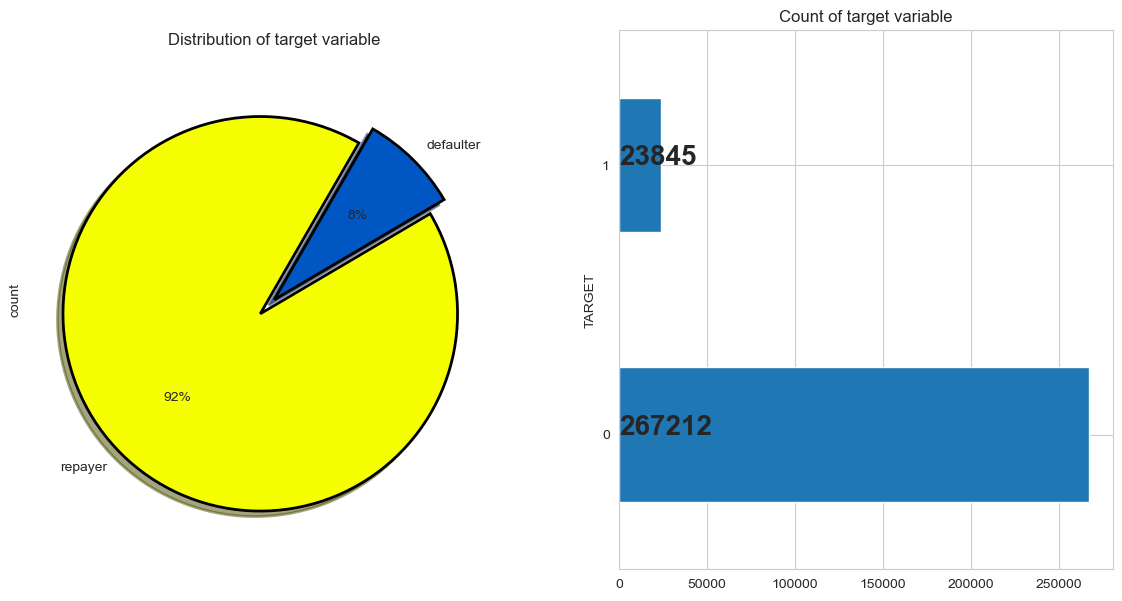

In [160]:
plt.figure(figsize=(14,7))
plt.subplot(121)
combined_df["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = combined_df["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(combined_df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

Distribution in Contract types

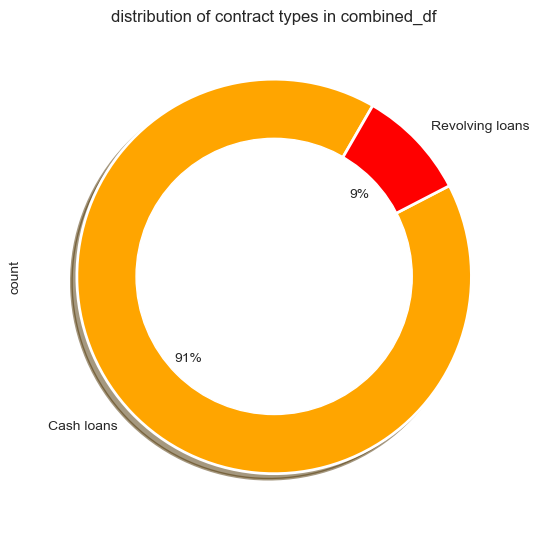

In [161]:
plt.figure(figsize=(14,7))
plt.subplot(121)
combined_df["NAME_CONTRACT_TYPE_x"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in combined_df")

plt.show()

Gender Distribution

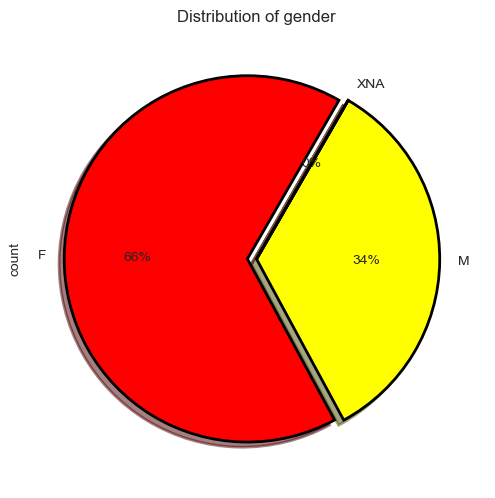

In [162]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

Distribution of Contract type by gender

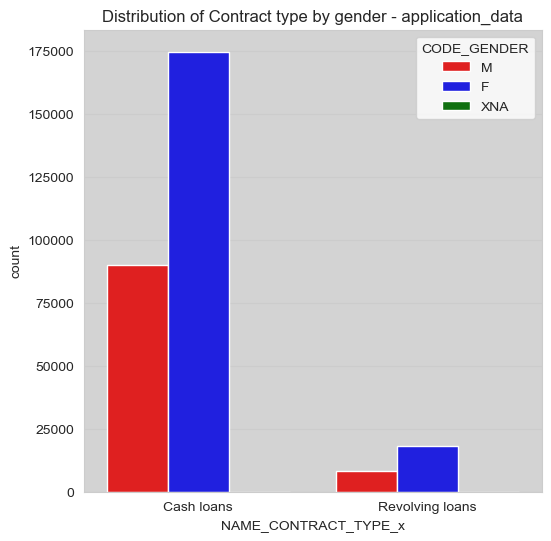

In [164]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot(x="NAME_CONTRACT_TYPE_x", hue="CODE_GENDER", data=combined_df, palette=["r", "b", "g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender - application_data")

plt.show()


Distribution of client owning a car and by gender

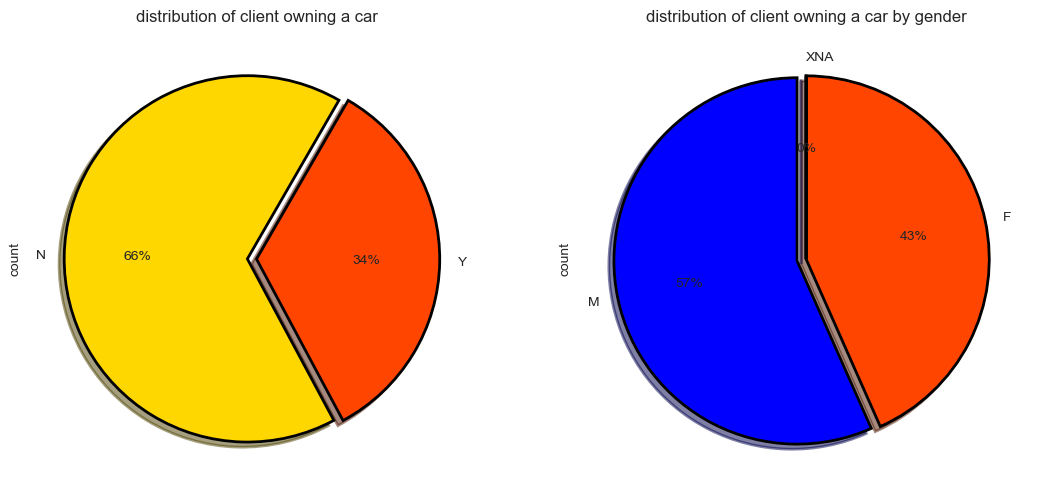

In [165]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
combined_df["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

Distribution of client owning a house or flat and by gender

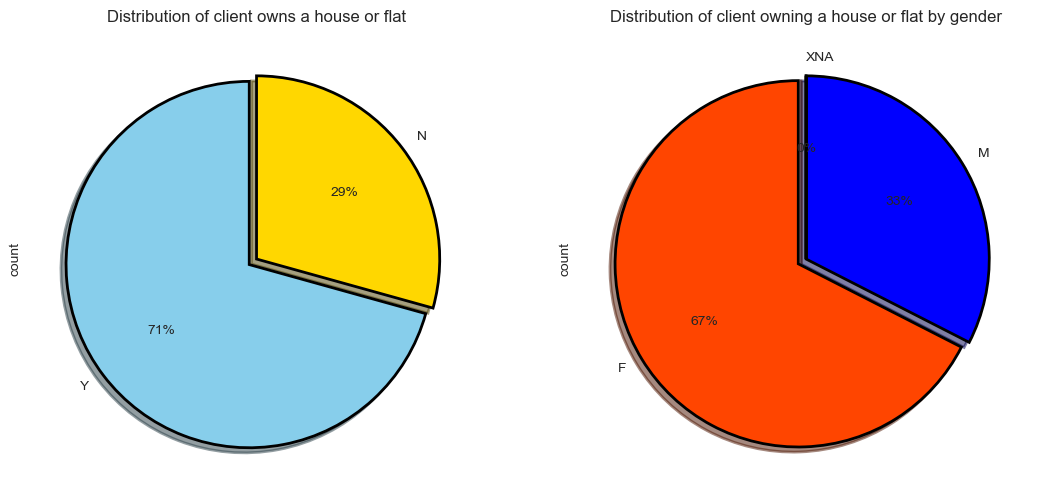

In [166]:
plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

Distribution of Number of children and family members of client by repayment status.

CNT_CHILDREN - Number of children the client has.

CNT_FAM_MEMBERS - How many family members does client have.

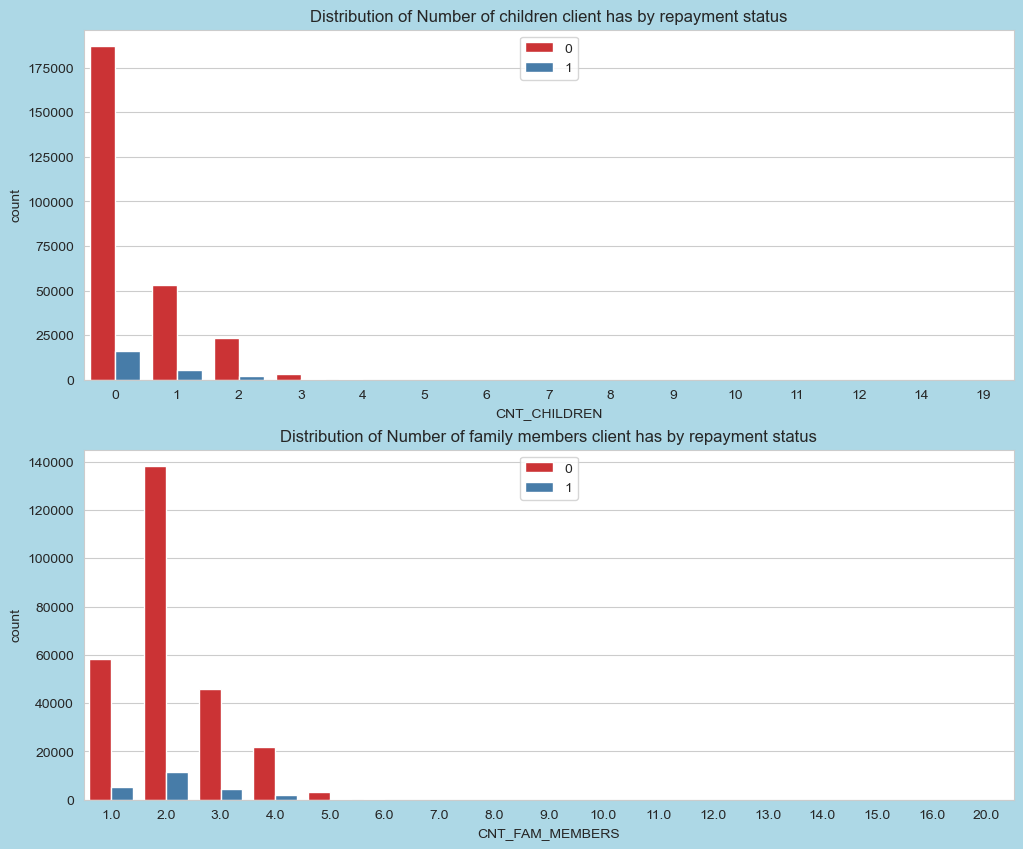

In [168]:
fig = plt.figure(figsize=(12,10))

# First subplot
plt.subplot(211)
sns.countplot(x="CNT_CHILDREN", hue="TARGET", data=combined_df, palette="Set1")
plt.legend(loc="upper center")
plt.title("Distribution of Number of children client has by repayment status")

# Second subplot
plt.subplot(212)
sns.countplot(x="CNT_FAM_MEMBERS", hue="TARGET", data=combined_df, palette="Set1")
plt.legend(loc="upper center")
plt.title("Distribution of Number of family members client has by repayment status")

fig.set_facecolor("lightblue")

plt.show()


Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

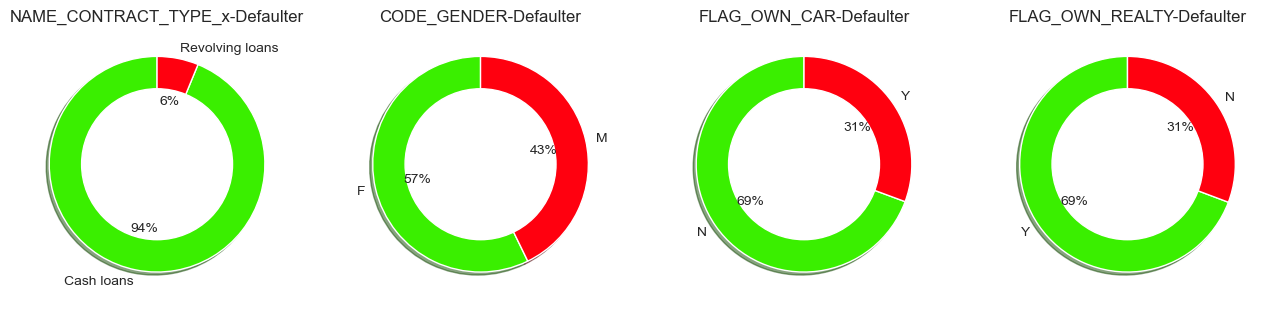

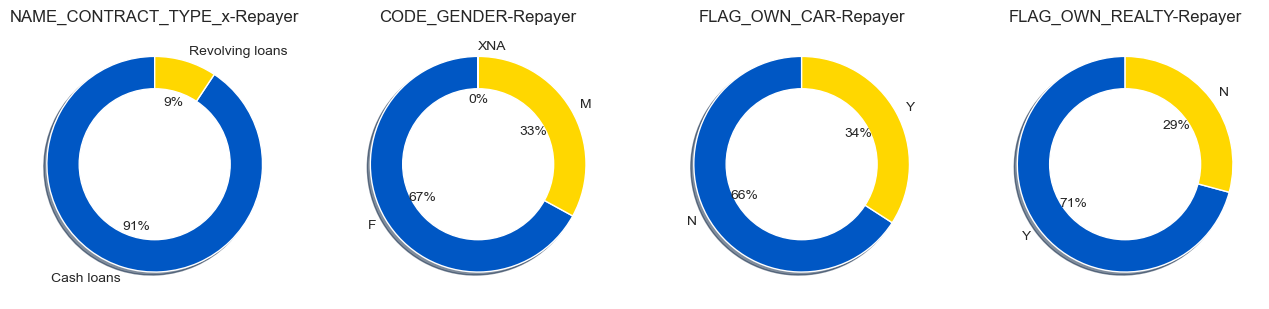

In [169]:
default = combined_df[combined_df["TARGET"]==1][[ 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = combined_df[combined_df["TARGET"]==0][[ 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

Distribution of amount data

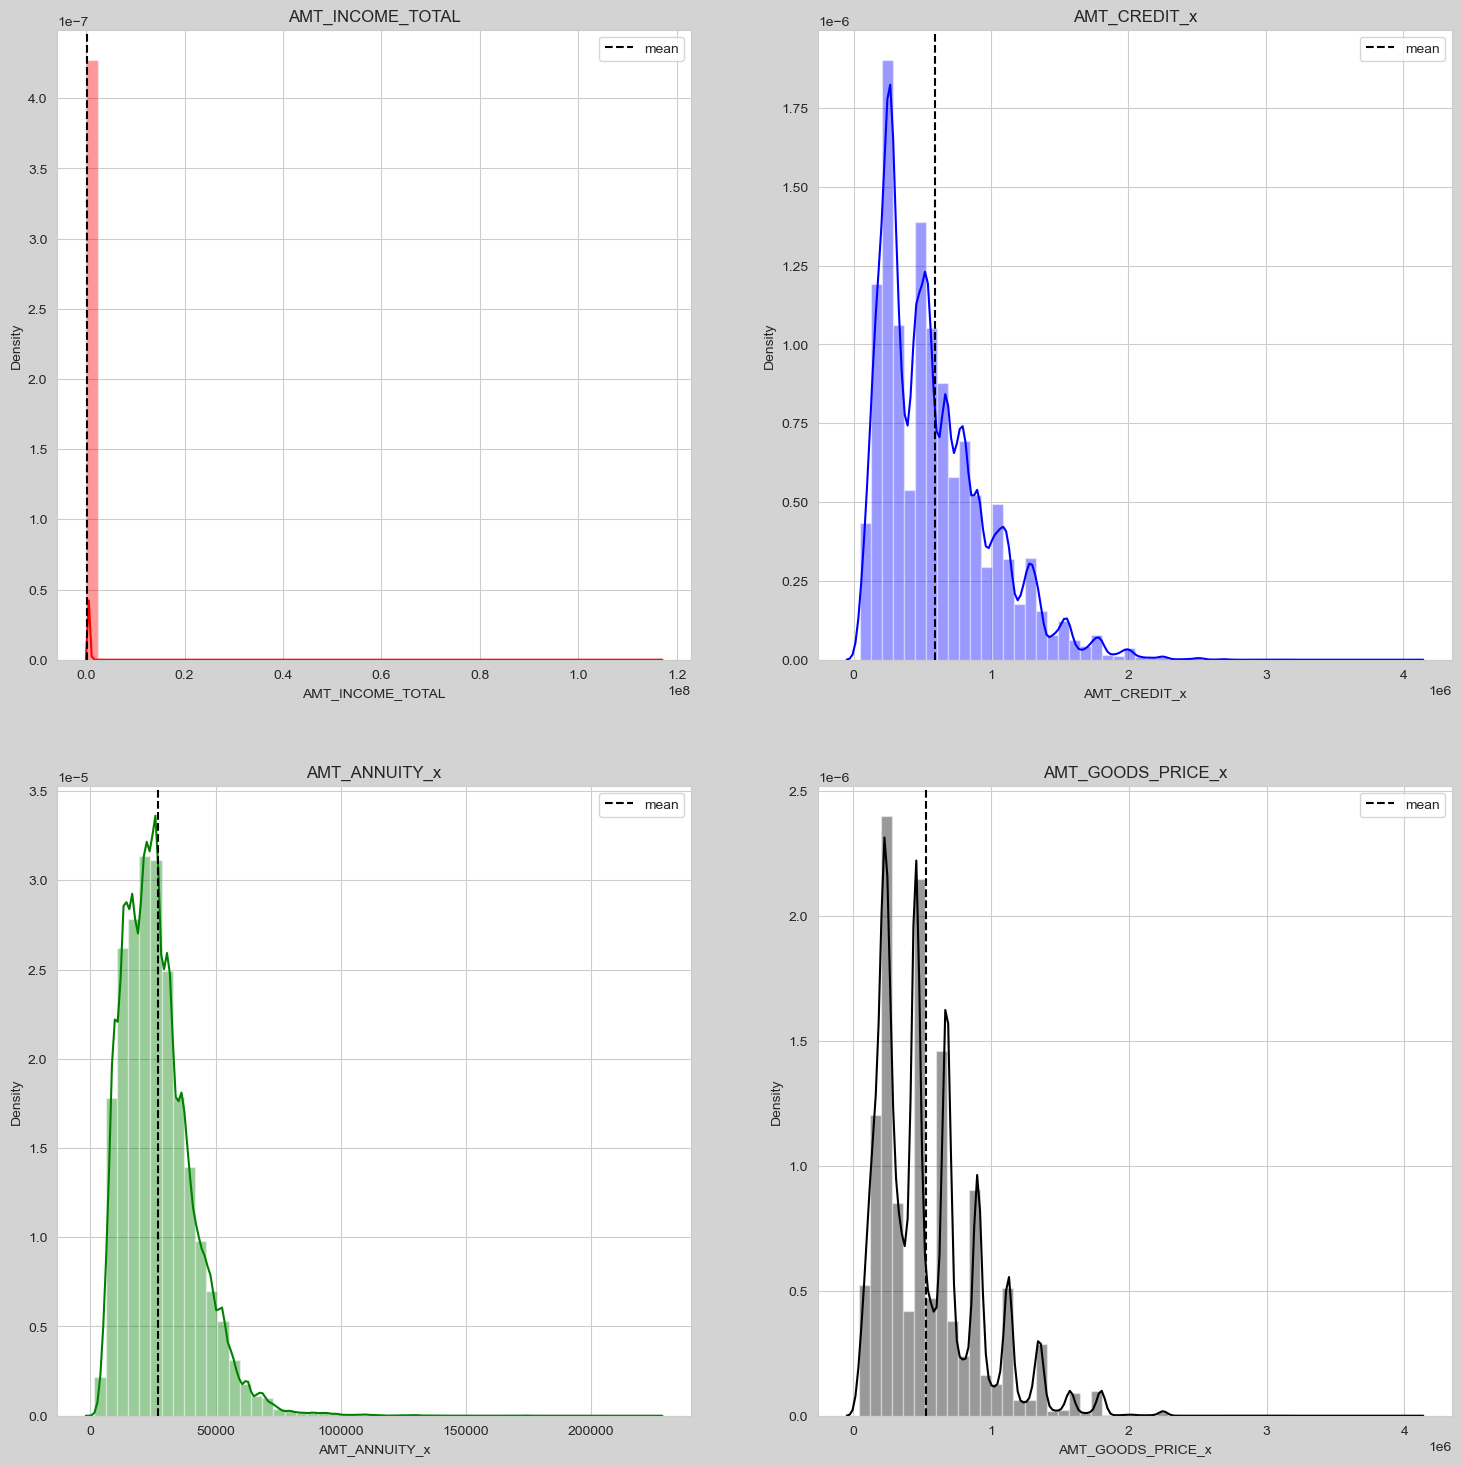

In [170]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x','AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(combined_df[combined_df[i].notnull()][i],color=k)
    plt.axvline(combined_df[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

Comparing summary statistics between defaulters and non - defaulters for loan amounts.

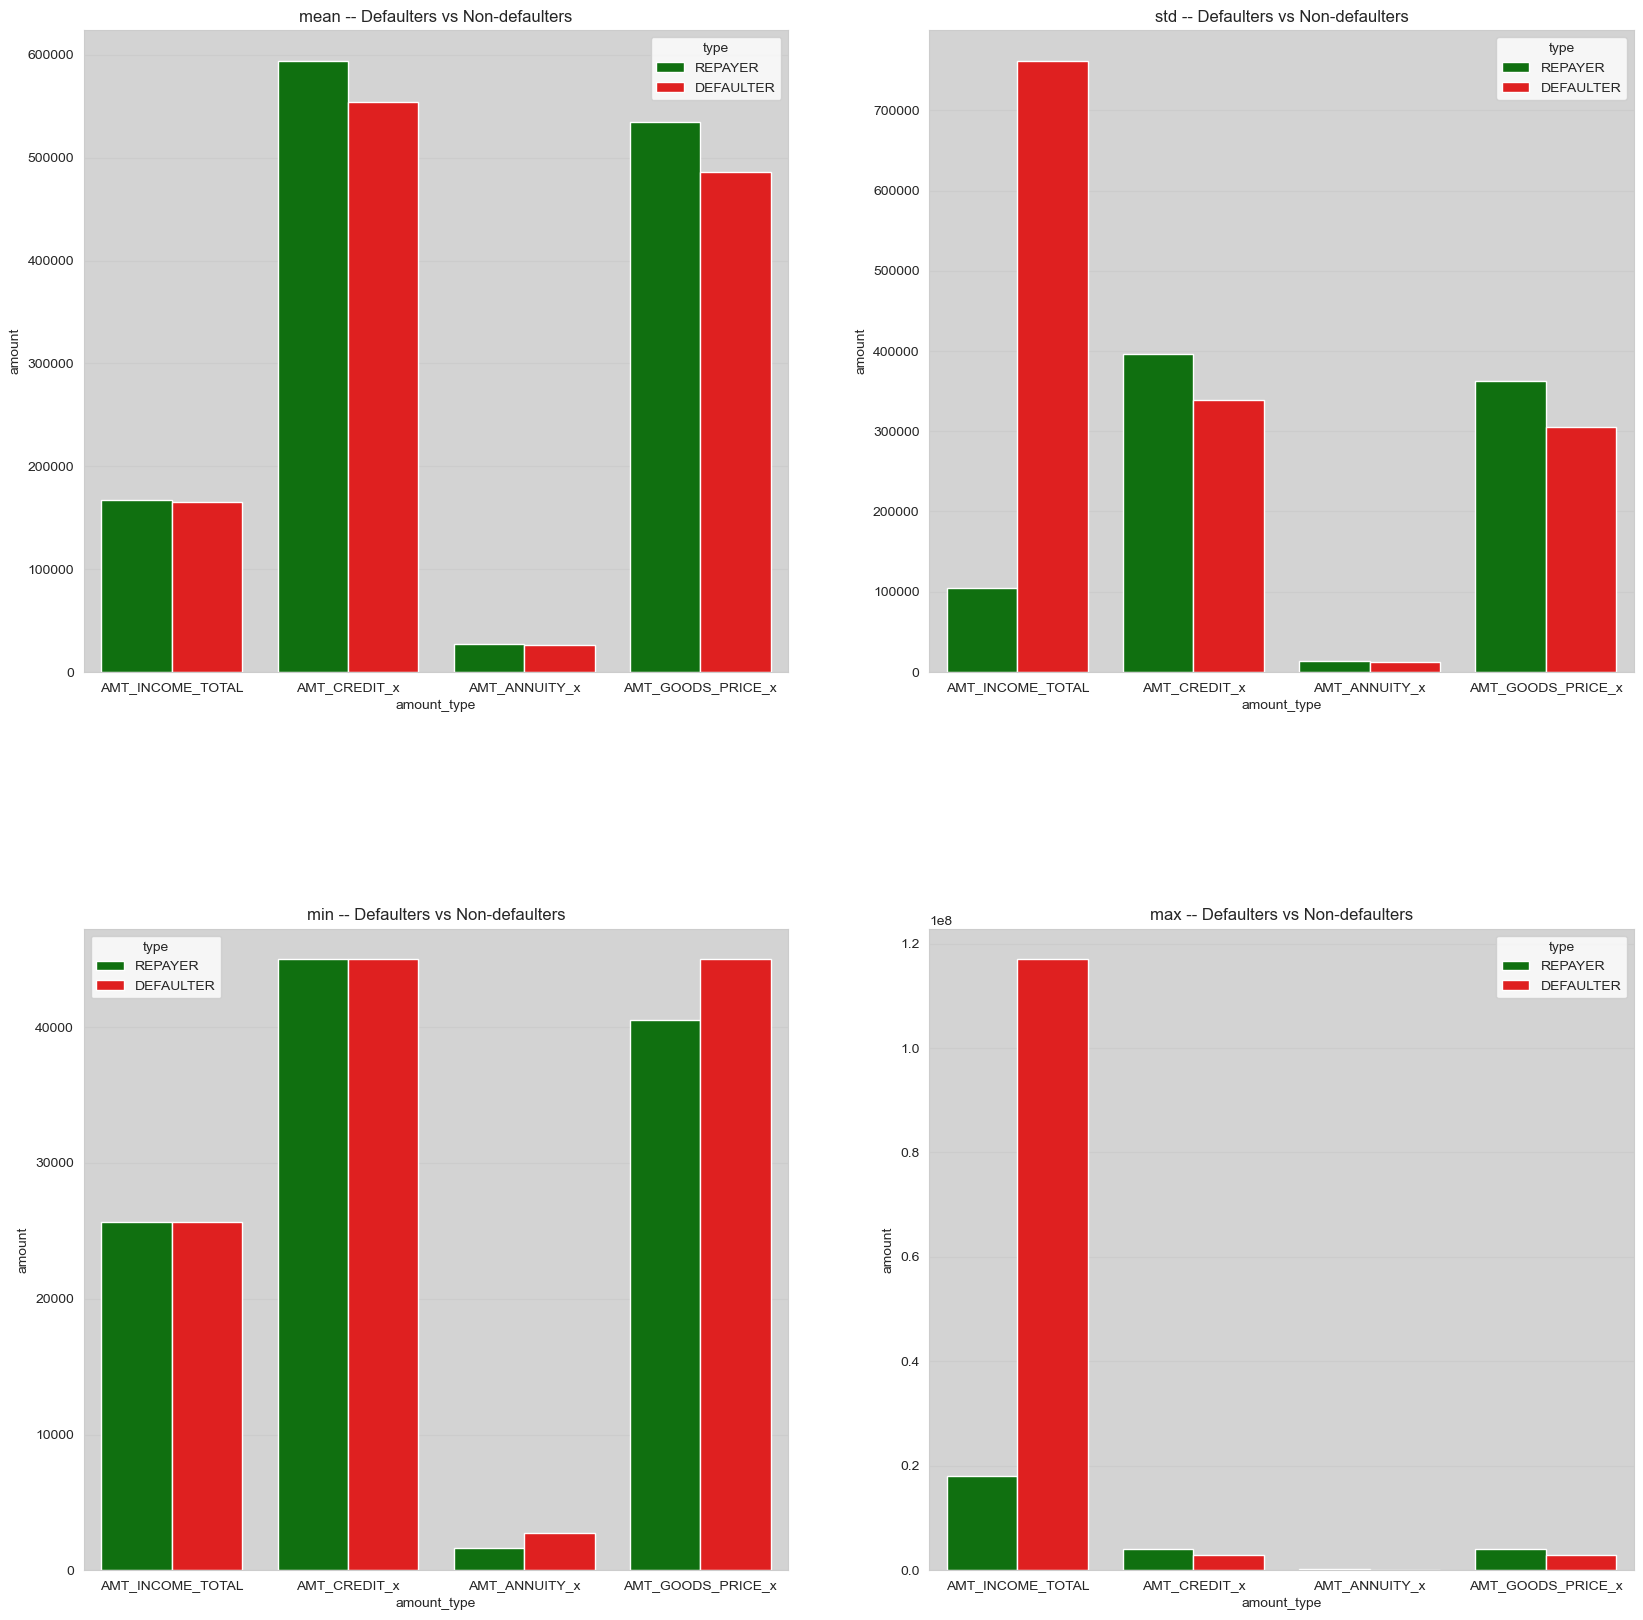

In [172]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Compare summary statistics between defaulters and non-defaulters for loan amounts
df = combined_df.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 

df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"

df_new = pd.concat([df_x, df_y], axis=0)

# Get unique statistics to plot
stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(20, 20))

# Create subplots for each statistic
for i, j in itertools.zip_longest(stat, range(length)):
    plt.subplot(2, 2, j + 1)
    # Use keyword arguments for sns.barplot
    fig = sns.barplot(x="amount_type", y="amount", data=df_new[df_new["statistic"] == i], 
                      hue="type", palette=["g", "r"])
    plt.title(f"{i} -- Defaulters vs Non-defaulters")
    plt.subplots_adjust(hspace=0.4)
    fig.set_facecolor("lightgrey")

plt.show()


Income of client 

1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings

Credit amount of the loan ,Loan annuity,Amount goods price -
1 . Statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

Average Income,credit,annuity & goods_price by gender

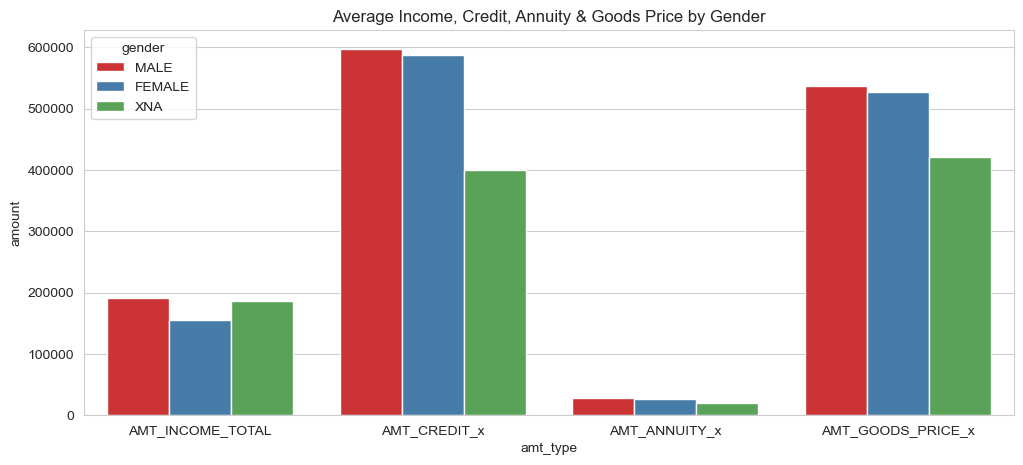

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns for the data
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']

# Calculate the mean for each gender group
df1 = combined_df.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

# Separate data for each gender
df_f = df1[["index", "F"]]
df_f = df_f.rename(columns={'index': "amt_type", 'F': "amount"})
df_f["gender"] = "FEMALE"

df_m = df1[["index", "M"]]
df_m = df_m.rename(columns={'index': "amt_type", 'M': "amount"})
df_m["gender"] = "MALE"

df_xna = df1[["index", "XNA"]]
df_xna = df_xna.rename(columns={'index': "amt_type", 'XNA': "amount"})
df_xna["gender"] = "XNA"

# Combine all gender data into a single DataFrame
df_gen = pd.concat([df_m, df_f, df_xna], axis=0)

# Create the barplot with correct keyword arguments
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="amt_type", y="amount", data=df_gen, hue="gender", palette="Set1")
plt.title("Average Income, Credit, Annuity & Goods Price by Gender")
plt.show()


Scatter plot between credit amount and annuity amount

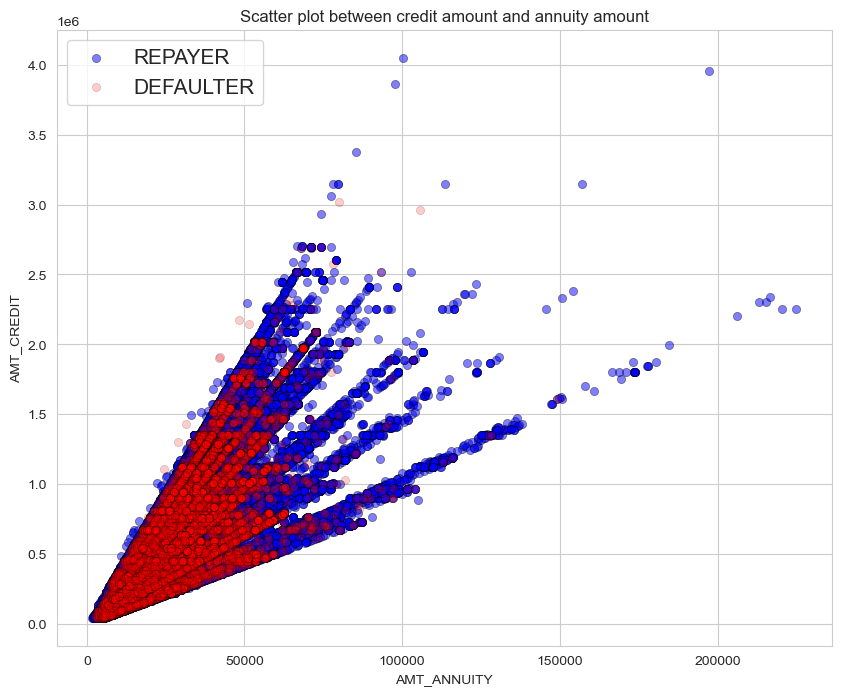

In [177]:
fig = plt.figure(figsize=(10,8))
plt.scatter(combined_df[combined_df["TARGET"]==0]['AMT_ANNUITY_x'],combined_df[combined_df["TARGET"]==0]['AMT_CREDIT_x'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(combined_df[combined_df["TARGET"]==1]['AMT_ANNUITY_x'],combined_df[combined_df["TARGET"]==1]['AMT_CREDIT_x'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

Pair Plot between amount variables

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

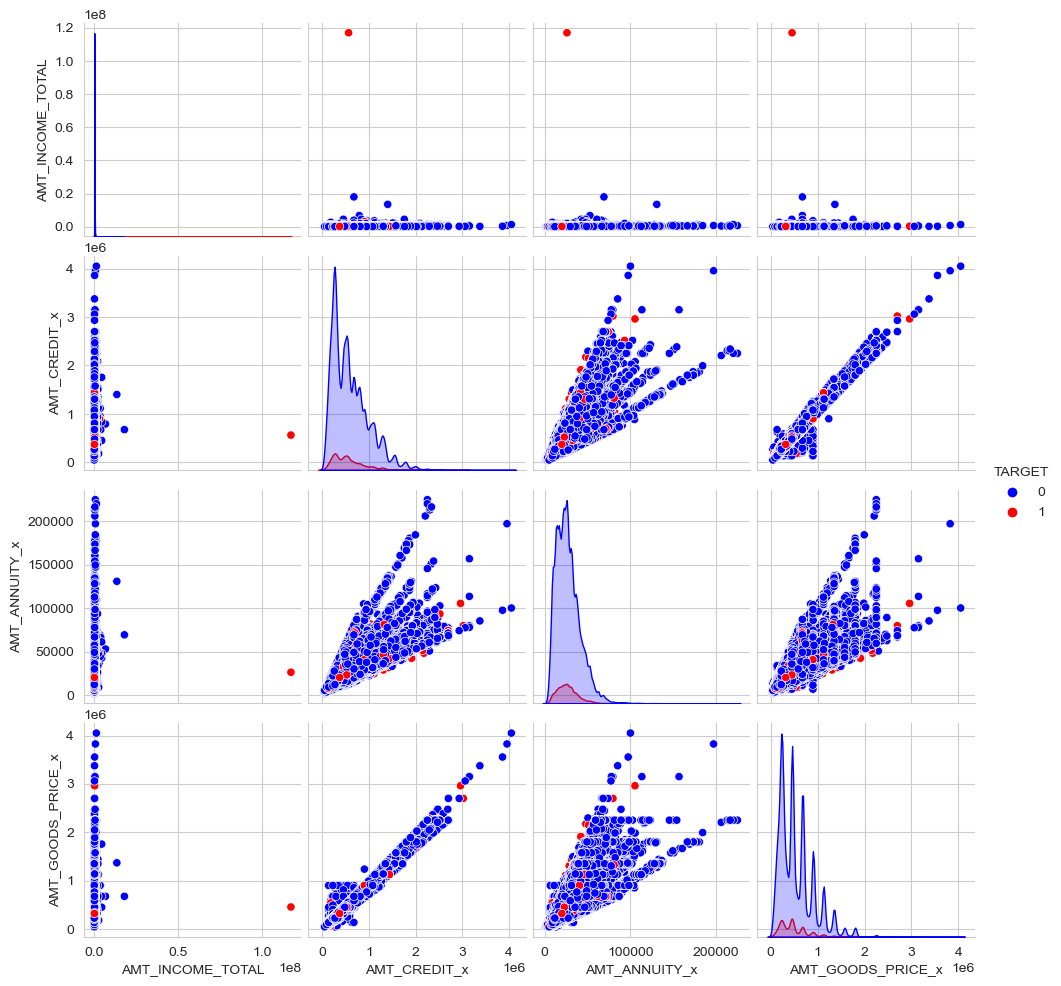

In [178]:
amt = combined_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT_x',
                         'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE_x"].notnull()) & (amt["AMT_ANNUITY_x"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

Distribution of Suite type

NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

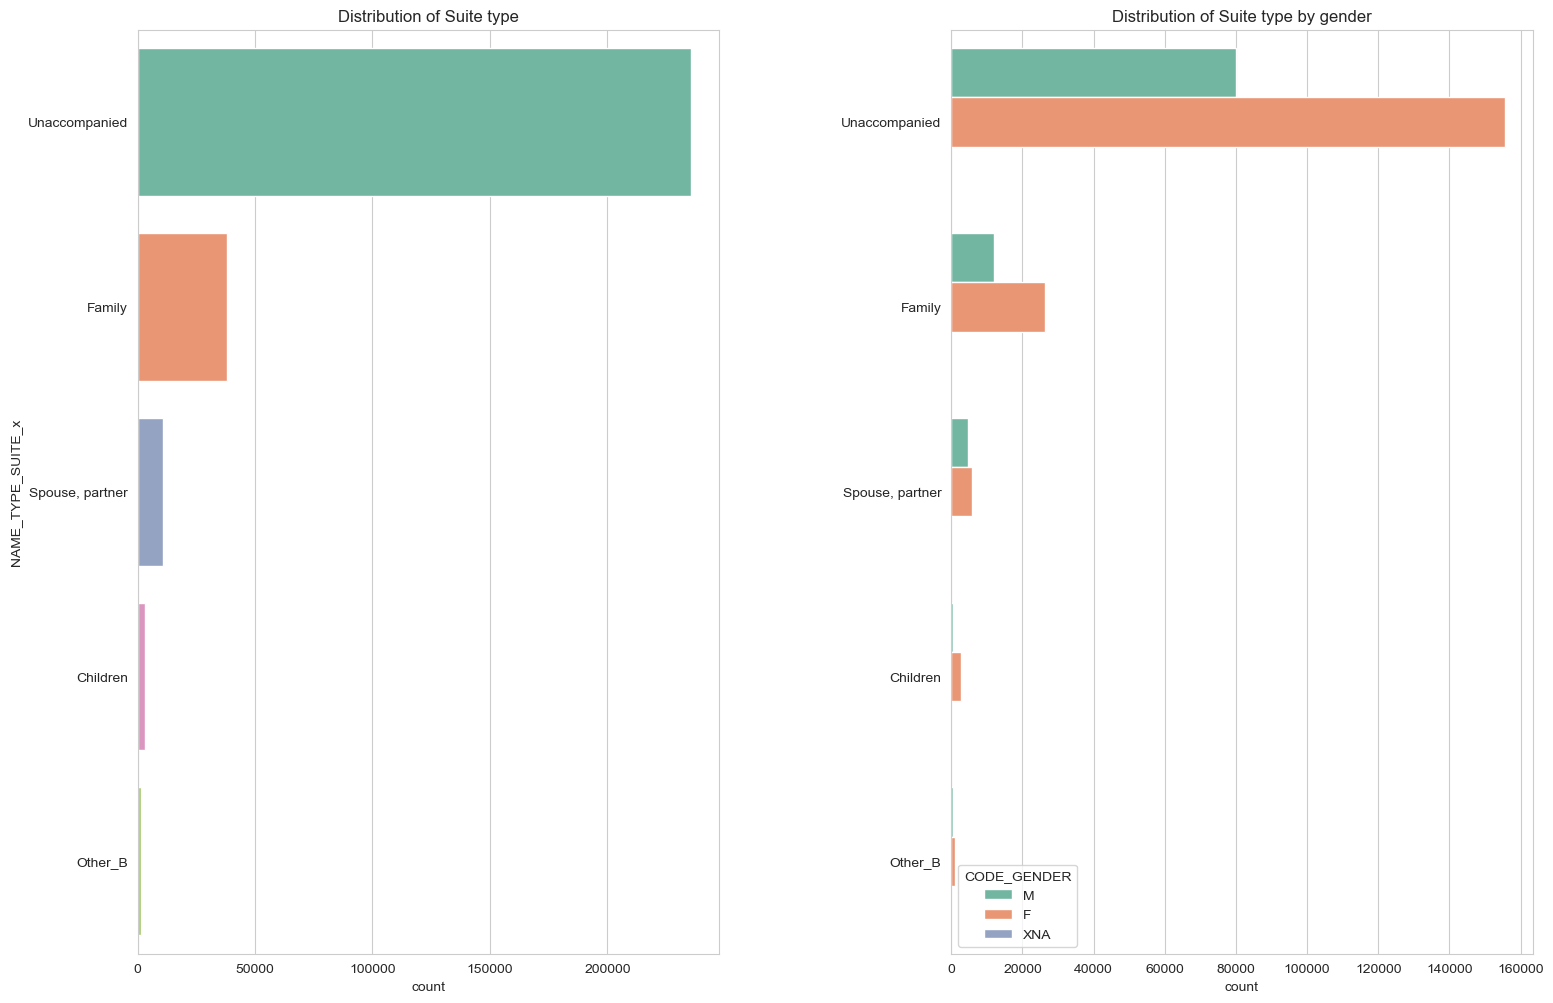

In [179]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              hue=combined_df["CODE_GENDER"],palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

Distribution of client income type

NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,…)

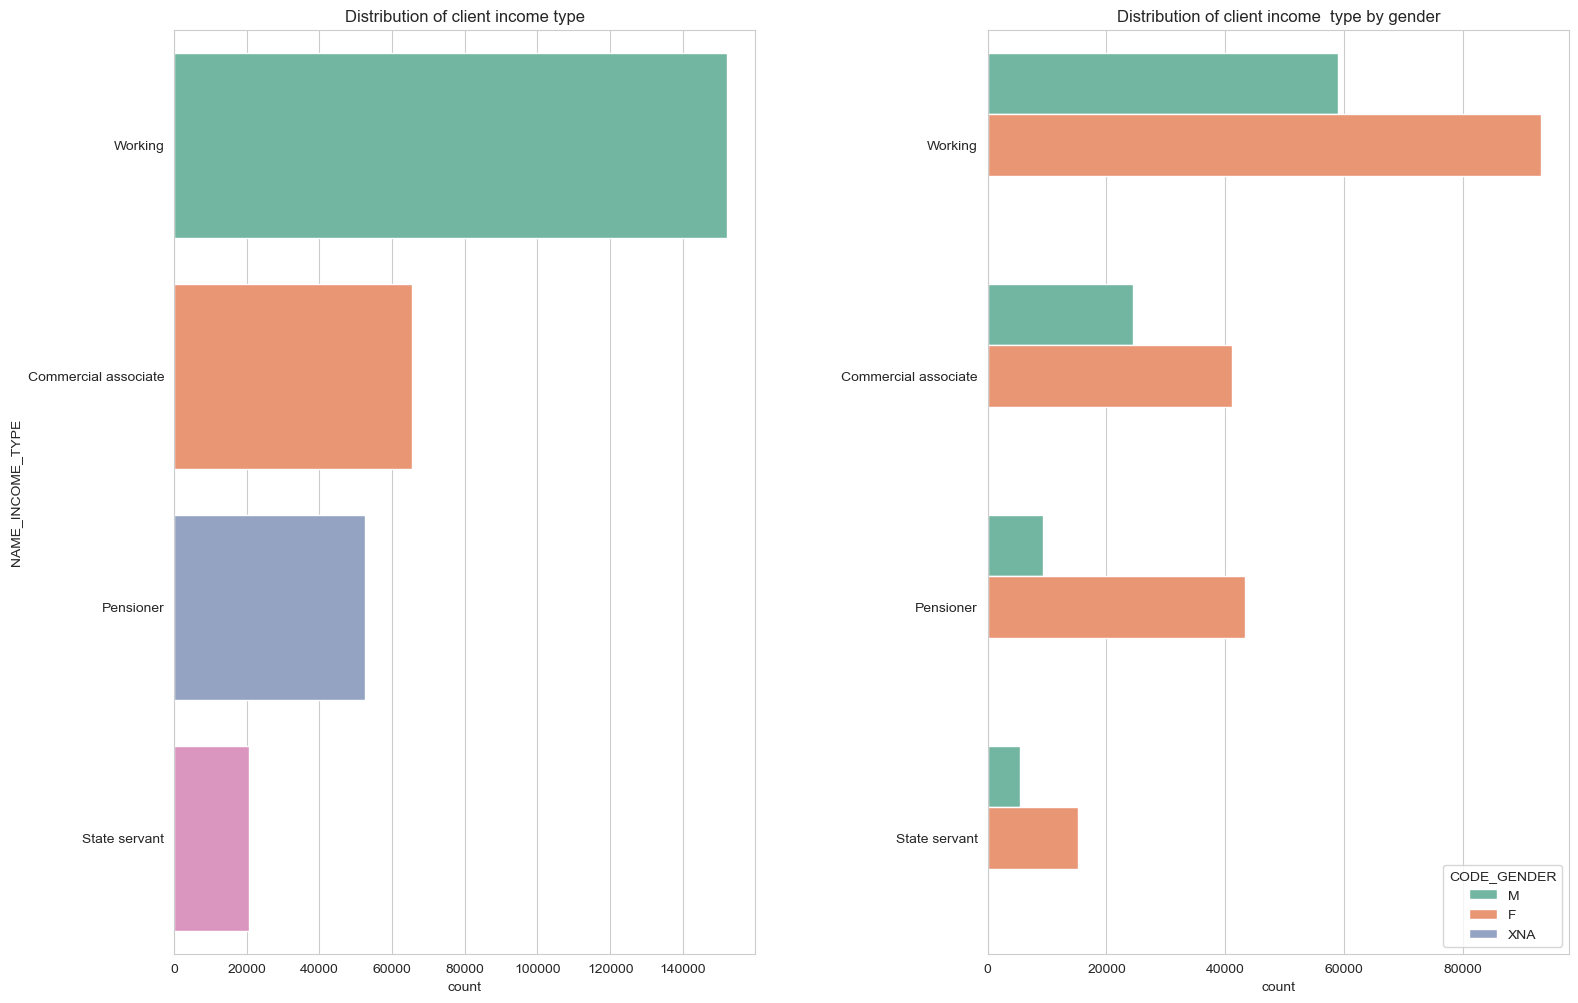

In [180]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=combined_df["NAME_INCOME_TYPE"],
              palette="Set2",
              order=combined_df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=combined_df["NAME_INCOME_TYPE"],
              hue=combined_df["CODE_GENDER"],
              palette="Set2",
              order=combined_df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

Average Earnings by different professions and education types

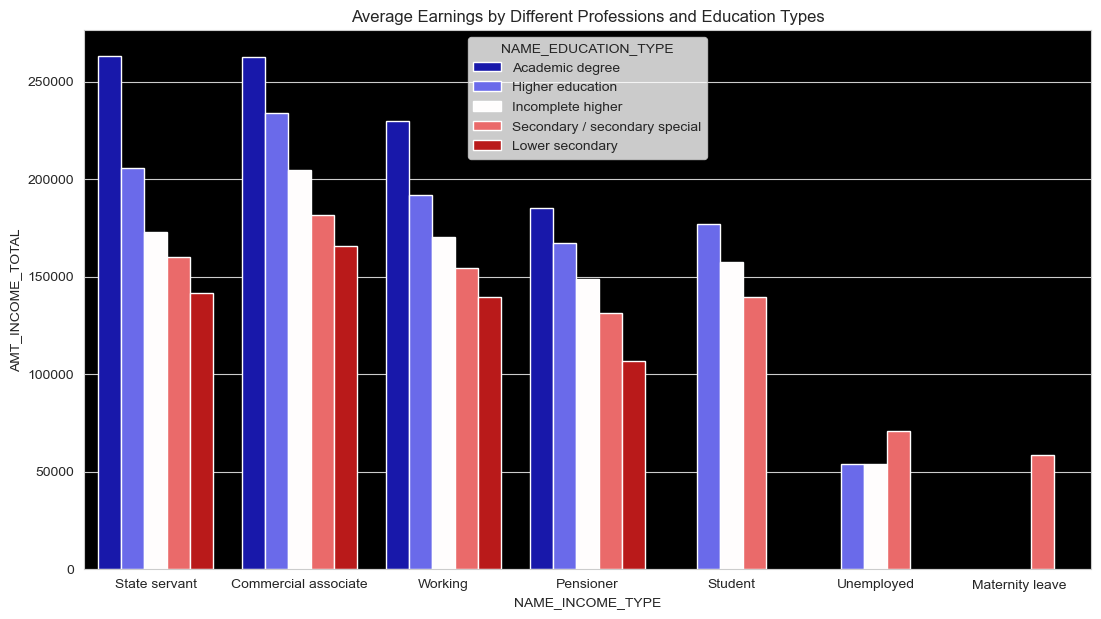

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by education type and income type, then calculate the mean income
edu = combined_df.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending=False)

# Create the plot
fig = plt.figure(figsize=(13, 7))
ax = sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=edu, hue='NAME_EDUCATION_TYPE', palette="seismic")

# Set the background color and title
ax.set_facecolor("k")
plt.title("Average Earnings by Different Professions and Education Types")

# Show the plot
plt.show()


Documents provided by the clients.

FLAG_DOCUMENT - Did client provide documents.(1,0)

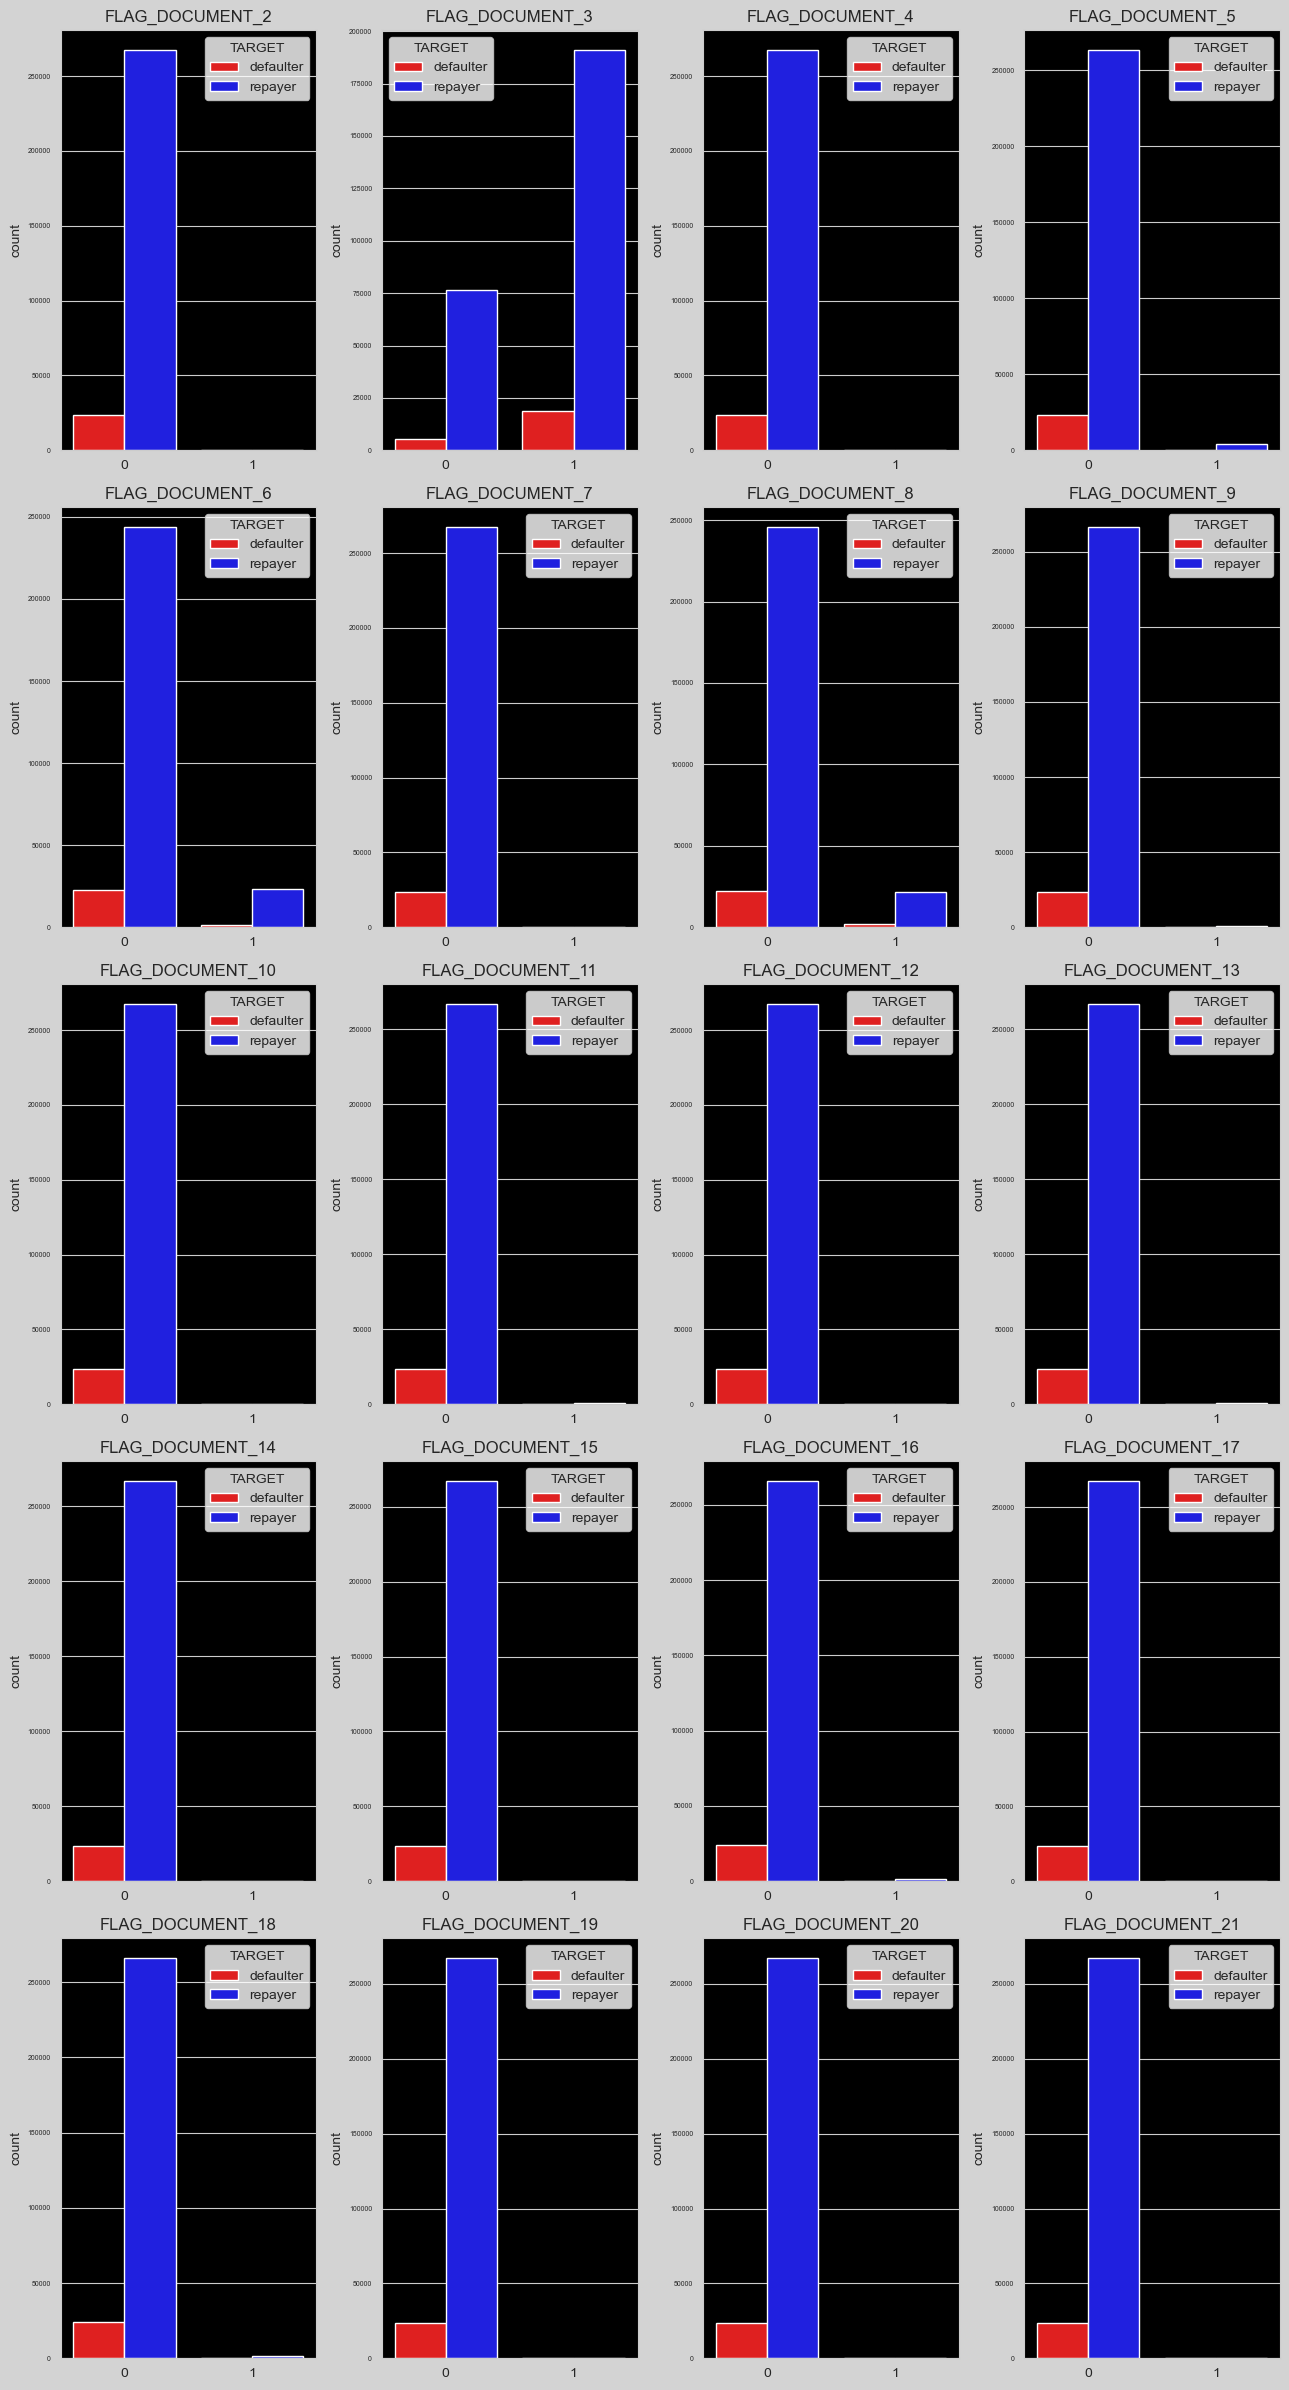

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Replace target values with labels for better readability
df_flag["TARGET"] = df_flag["TARGET"].replace({1: "defaulter", 0: "repayer"})

# Set up the figure with subplots
fig = plt.figure(figsize=(13, 24))
fig.set_facecolor("lightgrey")

# Loop over the columns and create count plots for each document flag
for i, j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(x=df_flag[i], hue=df_flag["TARGET"], palette=["r", "b"])  # Specify x
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("k")

# Show the plot
plt.tight_layout()
plt.show()


Total and average amounts applied and credited in previous applications

AMT_APPLICATION-For how much credit did client ask on the previous application. >AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

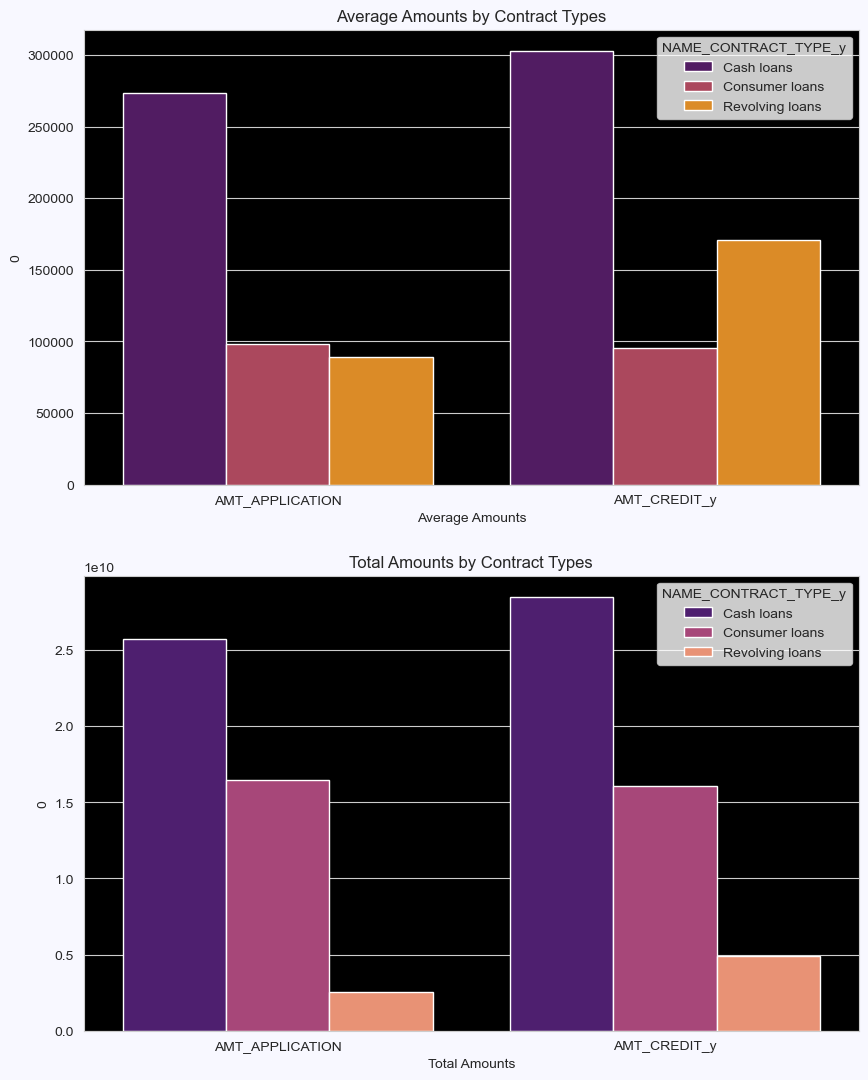

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by contract type and calculate the mean and sum
mn = combined_df.groupby("NAME_CONTRACT_TYPE_y")[["AMT_APPLICATION","AMT_CREDIT_y"]].mean().stack().reset_index()
tt = combined_df.groupby("NAME_CONTRACT_TYPE_y")[["AMT_APPLICATION","AMT_CREDIT_y"]].sum().stack().reset_index()

# Set up the figure for plotting
fig = plt.figure(figsize=(10, 13))
fig.set_facecolor("ghostwhite")

# Plot average amounts by contract types
plt.subplot(211)
ax = sns.barplot(x="level_1", y=0, data=mn[:6], hue="NAME_CONTRACT_TYPE_y", palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("Average Amounts")
ax.set_title("Average Amounts by Contract Types")

# Plot total amounts by contract types
plt.subplot(212)
ax1 = sns.barplot(x="level_1", y=0, data=tt[:6], hue="NAME_CONTRACT_TYPE_y", palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("Total Amounts")
ax1.set_title("Total Amounts by Contract Types")

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.2)

# Show the plot
plt.show()


Annuity of previous application

AMT_ANNUITY - Annuity of previous application

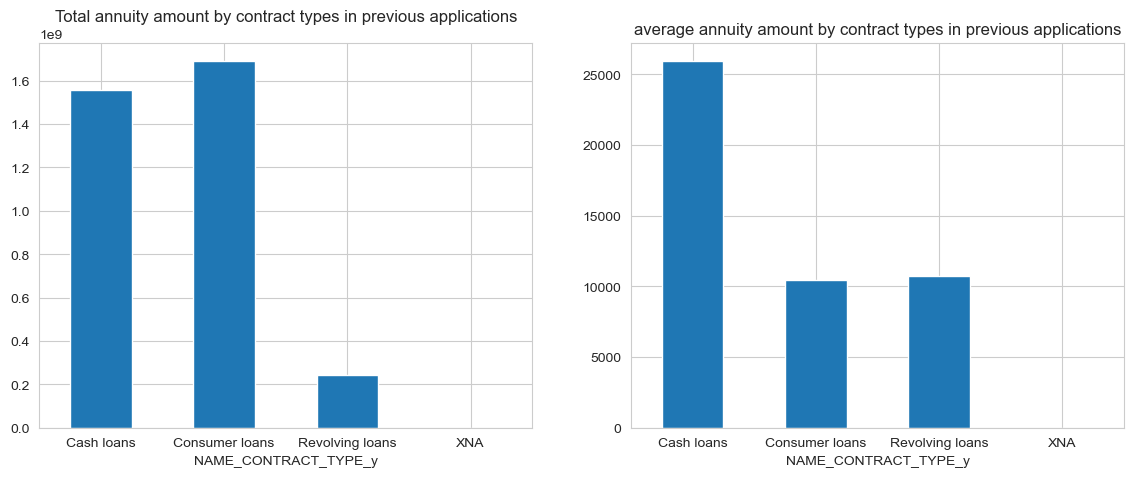

In [187]:
plt.figure(figsize=(14,5))
plt.subplot(121)
combined_df.groupby("NAME_CONTRACT_TYPE_y")["AMT_ANNUITY_y"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
combined_df.groupby("NAME_CONTRACT_TYPE_y")["AMT_ANNUITY_y"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()

Count of application status by application type.

NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.

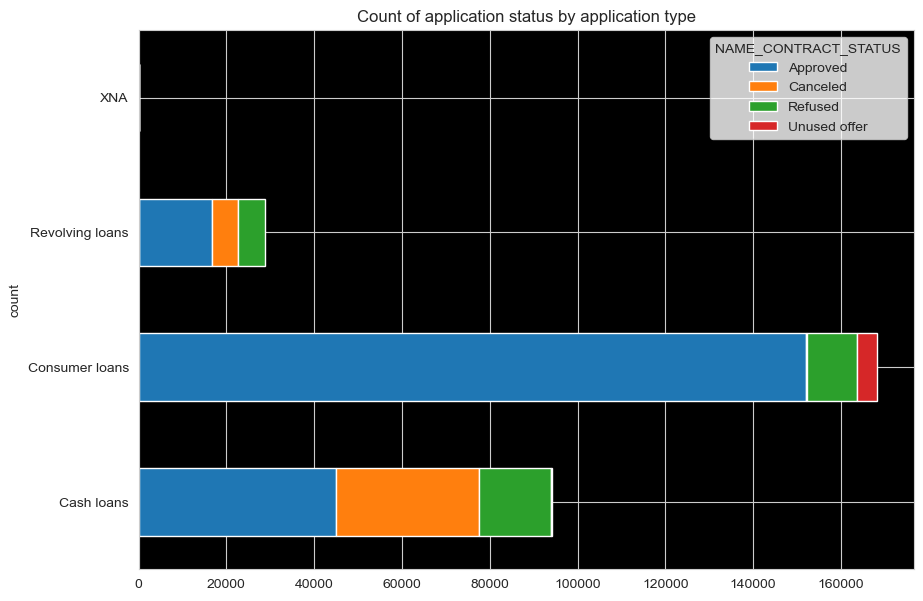

In [188]:
ax = pd.crosstab(combined_df["NAME_CONTRACT_TYPE_y"],combined_df["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

Point to infer from the graph:
    
Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

Percentage of applications accepted,cancelled,refused and unused for different loan purposes.

NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application.

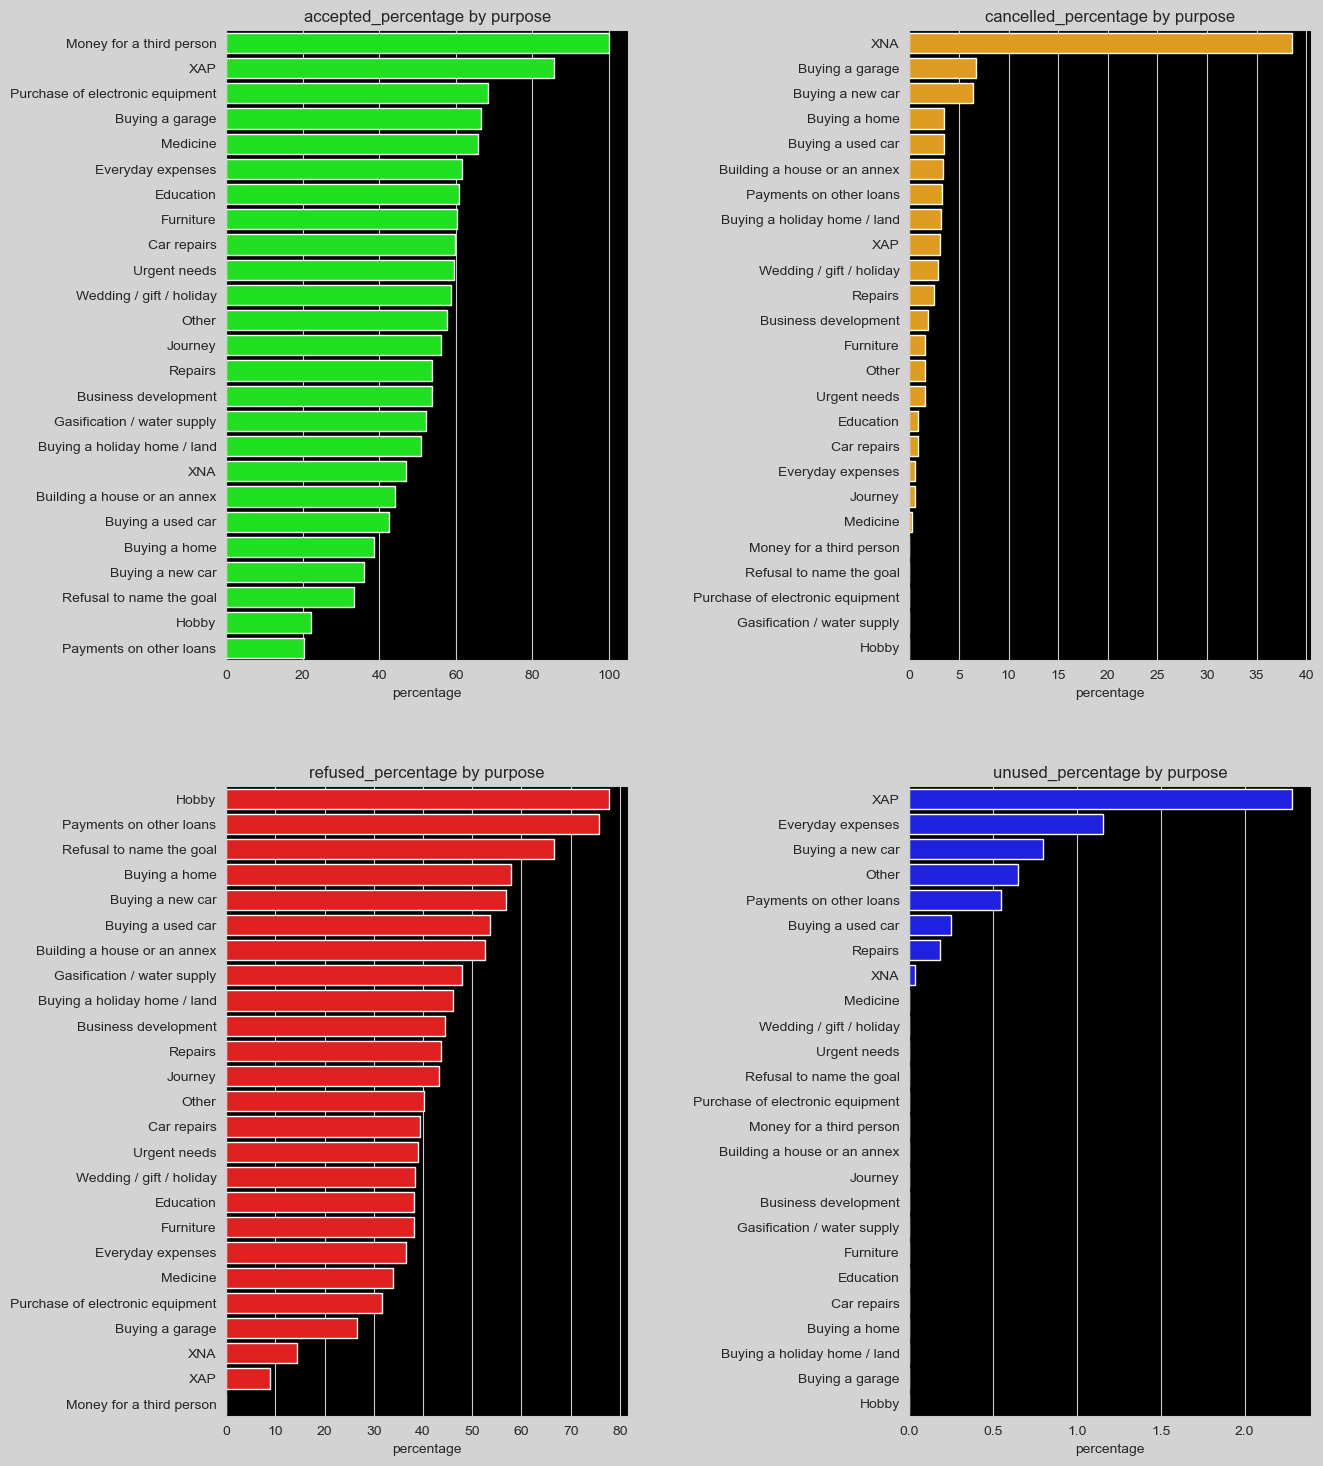

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# Creating the percentage values for different contract statuses
purpose = pd.crosstab(combined_df["NAME_CASH_LOAN_PURPOSE"], combined_df["NAME_CONTRACT_STATUS"])

# Calculating the percentage for each contract status type
purpose["a"] = (purpose["Approved"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])
purpose["r"] = (purpose["Refused"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"] * 100) / (purpose["Approved"] + purpose["Canceled"] + purpose["Refused"] + purpose["Unused offer"])

# Selecting the relevant columns and stacking the data
purpose_new = purpose[["a", "c", "r", "u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({
    "a": "accepted_percentage",
    "c": "cancelled_percentage",
    "r": "refused_percentage",
    "u": "unused_percentage"
})

# Preparing for plotting
lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime", "orange", "r", "b"]

# Plotting the data
fig = plt.figure(figsize=(14, 18))
fig.set_facecolor("lightgrey")

# Loop through the unique contract statuses and plot the data
for i, j, k in itertools.zip_longest(lst, range(length), cs):
    plt.subplot(2, 2, j + 1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(x=0, y="NAME_CASH_LOAN_PURPOSE", data=dat.sort_values(by=0, ascending=False), color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(f"{i} by purpose")
    plt.subplots_adjust(wspace=0.7)
    ax.set_facecolor("k")

plt.show()


Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like Hobby, payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

37.5% of XNA purpose loans are cancalle

Days variables - Relative to application date of current application

DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

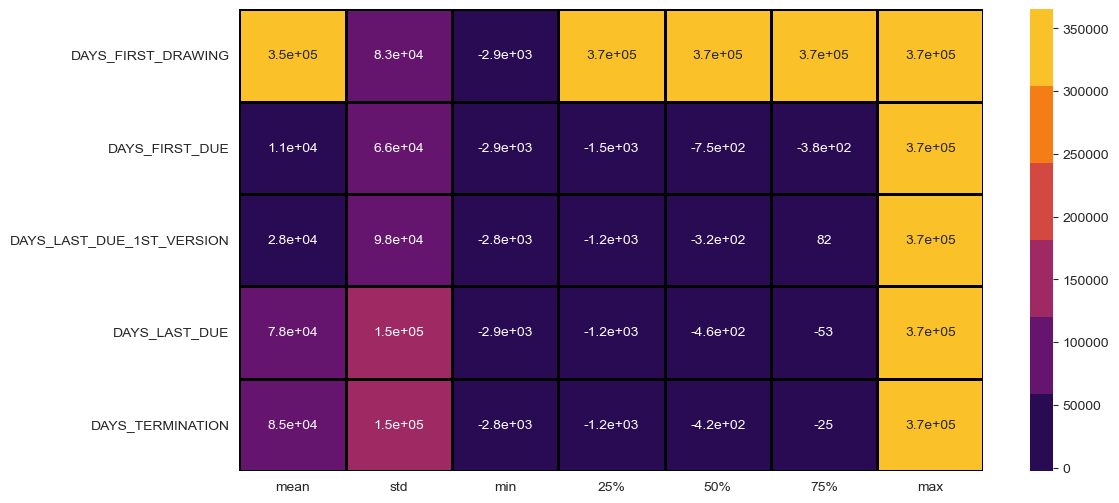

In [191]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(combined_df[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

# Top 10 Correlation Fields for Repayer

In [192]:
df_repayer = combined_df[combined_df['TARGET'] == 0]
df_defaulter = combined_df[combined_df['TARGET'] == 1]

In [194]:
# Select only numeric columns from the DataFrame
df_repayer_numeric = df_repayer.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = df_repayer_numeric.corr()

# Mask the upper triangle of the correlation matrix (to avoid redundant values)
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index to make it easier to work with
corrdf = corrdf.unstack().reset_index()

# Rename the columns for clarity
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows where the correlation is NaN
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values and take the absolute value
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort the correlations in descending order and show the top 10
corrdf.sort_values(by='Correlation', ascending=False).head(10)


Var1                        Var2  Correlation
4786            AMT_GOODS_PRICE_y             AMT_APPLICATION         1.00
2278     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
984                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
4787            AMT_GOODS_PRICE_y                AMT_CREDIT_y         0.99
454             AMT_GOODS_PRICE_x                AMT_CREDIT_x         0.99
4711                 AMT_CREDIT_y             AMT_APPLICATION         0.97
1519  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
5547             DAYS_TERMINATION               DAYS_LAST_DUE         0.93
1352              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1823  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.87

In [196]:
# Select only numeric columns from the df_defaulter DataFrame
df_defaulter_numeric = df_defaulter.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numeric columns
corrmat = df_defaulter_numeric.corr()

# Mask the upper triangle of the correlation matrix (to avoid redundant values)
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Unstack the correlation matrix and reset the index to make it easier to work with
corrdf = corrdf.unstack().reset_index()

# Rename the columns for clarity
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows where the correlation is NaN
corrdf.dropna(subset=['Correlation'], inplace=True)

# Round the correlation values and take the absolute value
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort the correlations in descending order and show the top 10
corrdf.sort_values(by='Correlation', ascending=False).head(10)


Var1                      Var2  Correlation
4786            AMT_GOODS_PRICE_y           AMT_APPLICATION         1.00
984                FLAG_EMP_PHONE             DAYS_EMPLOYED         1.00
2278     OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00
4787            AMT_GOODS_PRICE_y              AMT_CREDIT_y         0.99
454             AMT_GOODS_PRICE_x              AMT_CREDIT_x         0.98
4711                 AMT_CREDIT_y           AMT_APPLICATION         0.97
1519  REGION_RATING_CLIENT_W_CITY      REGION_RATING_CLIENT         0.96
5547             DAYS_TERMINATION             DAYS_LAST_DUE         0.94
5394    DAYS_LAST_DUE_1ST_VERSION        DAYS_FIRST_DRAWING         0.90
1352              CNT_FAM_MEMBERS              CNT_CHILDREN         0.89